In [1]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt, lfilter, freqz
import matplotlib.pyplot as plt

In [2]:
raw_data_path = '/Users/patriciawatanabe/Projects/Neurotech/NTUT25_Software/data/accelerometer/raw/801_1_accelerometer.pkl'

In [3]:
# Load the raw accelerometer data
try:
    # Load the data, which is a numpy array
    accel_data_array = pd.read_pickle(raw_data_path)
    # Transpose the array to ensure columns correspond to axes (x, y, z)
    # The original shape is (3, 93501), so we transpose it to (93501, 3)
    accel_data_array = accel_data_array.T
    # Convert the transposed array to a pandas DataFrame with x, y, z columns
    df_accel = pd.DataFrame(accel_data_array, columns=['x', 'y', 'z'])
    print("Data loaded, transposed, and converted to DataFrame successfully.")
    print(df_accel.head())
    
except FileNotFoundError:
    print(f"Error: The file at {raw_data_path} was not found.")
    df_accel = None

Data loaded, transposed, and converted to DataFrame successfully.
             x             y            z
0  623823.3750 -9.969514e+05 -935598.0000
1  620121.9375 -9.979850e+05 -938785.6875
2  618349.6250 -1.001284e+06 -942259.4375
3  616810.9375 -1.005281e+06 -945407.1250
4  614162.6875 -1.008645e+06 -949929.6250


In [4]:
# Convert the entire DataFrame to float64 to ensure accurate calculations
if df_accel is not None:
    df_accel = df_accel.astype(np.float64)
    print("\nDataFrame converted to float64 data type.")
    print(df_accel.head())


DataFrame converted to float64 data type.
             x             y            z
0  623823.3750 -9.969514e+05 -935598.0000
1  620121.9375 -9.979850e+05 -938785.6875
2  618349.6250 -1.001284e+06 -942259.4375
3  616810.9375 -1.005281e+06 -945407.1250
4  614162.6875 -1.008645e+06 -949929.6250


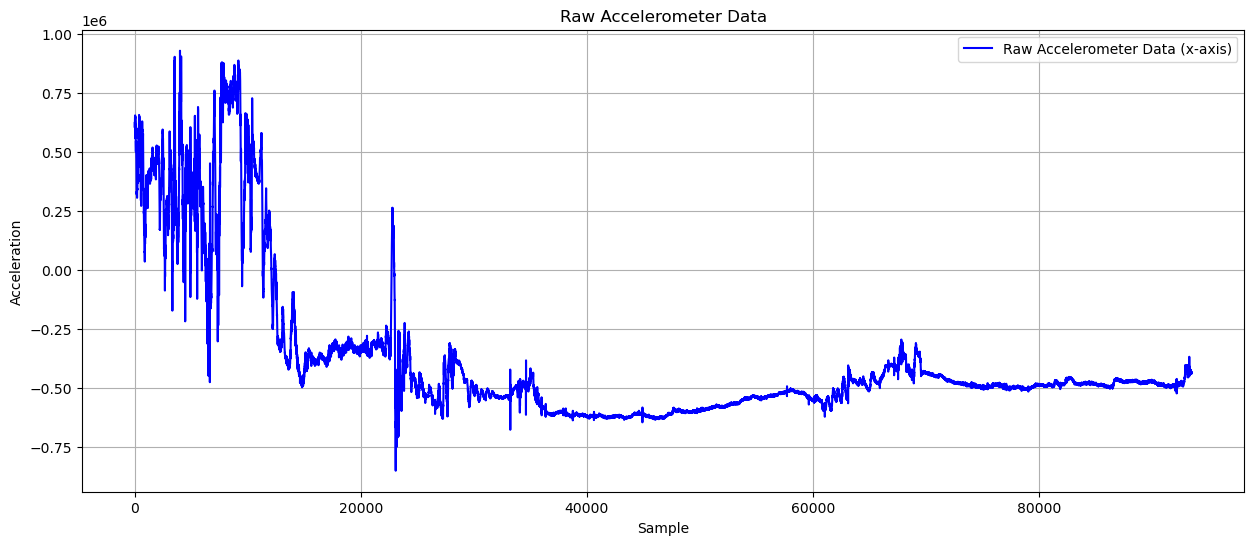

In [5]:
if df_accel is not None:
    plt.figure(figsize=(15, 6))
    plt.plot(df_accel['x'], label='Raw Accelerometer Data (x-axis)', color='blue')
    plt.title('Raw Accelerometer Data')
    plt.xlabel('Sample')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assume df_accel exists from a previous step and contains the raw data
# # Placeholder for the calibration factor
# # Please replace this with the correct value from your sensor's documentation
# calibration_factor = 256.0  # Example: 16384 for a sensor with a 16-bit range

# # Calibrate the raw data
# if 'df_accel' in locals():
#     # Create a new DataFrame for the calibrated data to preserve the raw data
#     df_accel_calibrated = df_accel.copy()
    
#     # Convert to float64 and divide by the calibration factor
#     df_accel_calibrated = df_accel_calibrated.astype(np.float64) / calibration_factor
    
#     print("Raw data calibrated successfully. The calibrated data is in 'df_accel_calibrated'.")
#     print(df_accel_calibrated.head())
    
#     # Plot the raw and calibrated data for comparison
#     fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
    
#     # Plot of Raw Data
#     ax1.plot(df_accel_calibrated['x'], label='Raw Data (X-axis)', color='gray')
#     ax1.set_title('Raw Accelerometer Data')
#     ax1.set_ylabel('Acceleration (Raw)')
#     ax1.legend()
#     ax1.grid(True)
    
#     # Plot of Calibrated Data
#     ax2.plot(df_accel_calibrated['x'], label='Calibrated Data (X-axis)', color='blue')
#     ax2.set_title('Calibrated Accelerometer Data')
#     ax2.set_xlabel('Sample')
#     ax2.set_ylabel('Acceleration (Calibrated)')
#     ax2.legend()
#     ax2.grid(True)
    
#     plt.tight_layout()
#     plt.show()

# else:
#     print("Error: 'df_accel' DataFrame was not found. Please ensure your raw data is loaded correctly.")

In [6]:
# import pandas as pd
# import numpy as np

# # Assuming df_accel is your raw, uncalibrated DataFrame

# # Calculate the absolute maximum value across all axes
# max_abs_value = df_accel.abs().max().max()

# # Normalize the entire DataFrame
# df_accel_normalized = df_accel.astype(np.float64) / max_abs_value

# print("DataFrame normalized successfully.")
# print("First 5 rows of the normalized data:")
# print(df_accel_normalized.head())

In [7]:
# import numpy as np
# import matplotlib.pyplot as plt

# # The plotting code assumes the df_accel_normalized variable has been created.
# # We will use the first 500 samples for better visualization.
# if 'df_accel_normalized' in locals() and df_accel_normalized is not None:
#     plt.figure(figsize=(15, 6))
    
#     # Plot the normalized data
#     plt.plot(df_accel_normalized['x'][:500], label='Normalized Data (x-axis)', color='purple')
    
#     # Add horizontal lines to mark the -1 to 1 range
#     plt.axhline(y=1, color='red', linestyle='--', label='Max Value (1)')
#     plt.axhline(y=-1, color='red', linestyle='--', label='Min Value (-1)')
    
#     plt.title('Normalized Accelerometer Data')
#     plt.xlabel('Sample')
#     plt.ylabel('Amplitude')
#     plt.ylim(-1.5, 1.5)
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [8]:
import pandas as pd
import numpy as np

# Assuming df_accel_calibrated is your calibrated DataFrame
# We'll use a window size of 500 samples (5 seconds at 100 Hz)
moving_average_window = 500

# Calculate the moving average for each axis
moving_average = df_accel.rolling(window=moving_average_window, center=True).mean()

# Subtract the moving average from the calibrated data to remove drift
df_no_drift = df_accel - moving_average

# Drop the NaN values that result from the moving average calculation at the edges
df_no_drift = df_no_drift.dropna()

print("Drift removed from the data. First 5 rows of the new DataFrame:")
print(df_no_drift.head())

Drift removed from the data. First 5 rows of the new DataFrame:
                 x              y              z
250  -81730.286125    6689.587500 -153300.190000
251  -57997.090500  -33121.136625 -139961.825375
252  -43905.747688 -129845.143875 -123686.522125
253  -77284.225750 -271226.289750 -153724.605875
254 -124019.119125 -346936.119500 -216401.125750


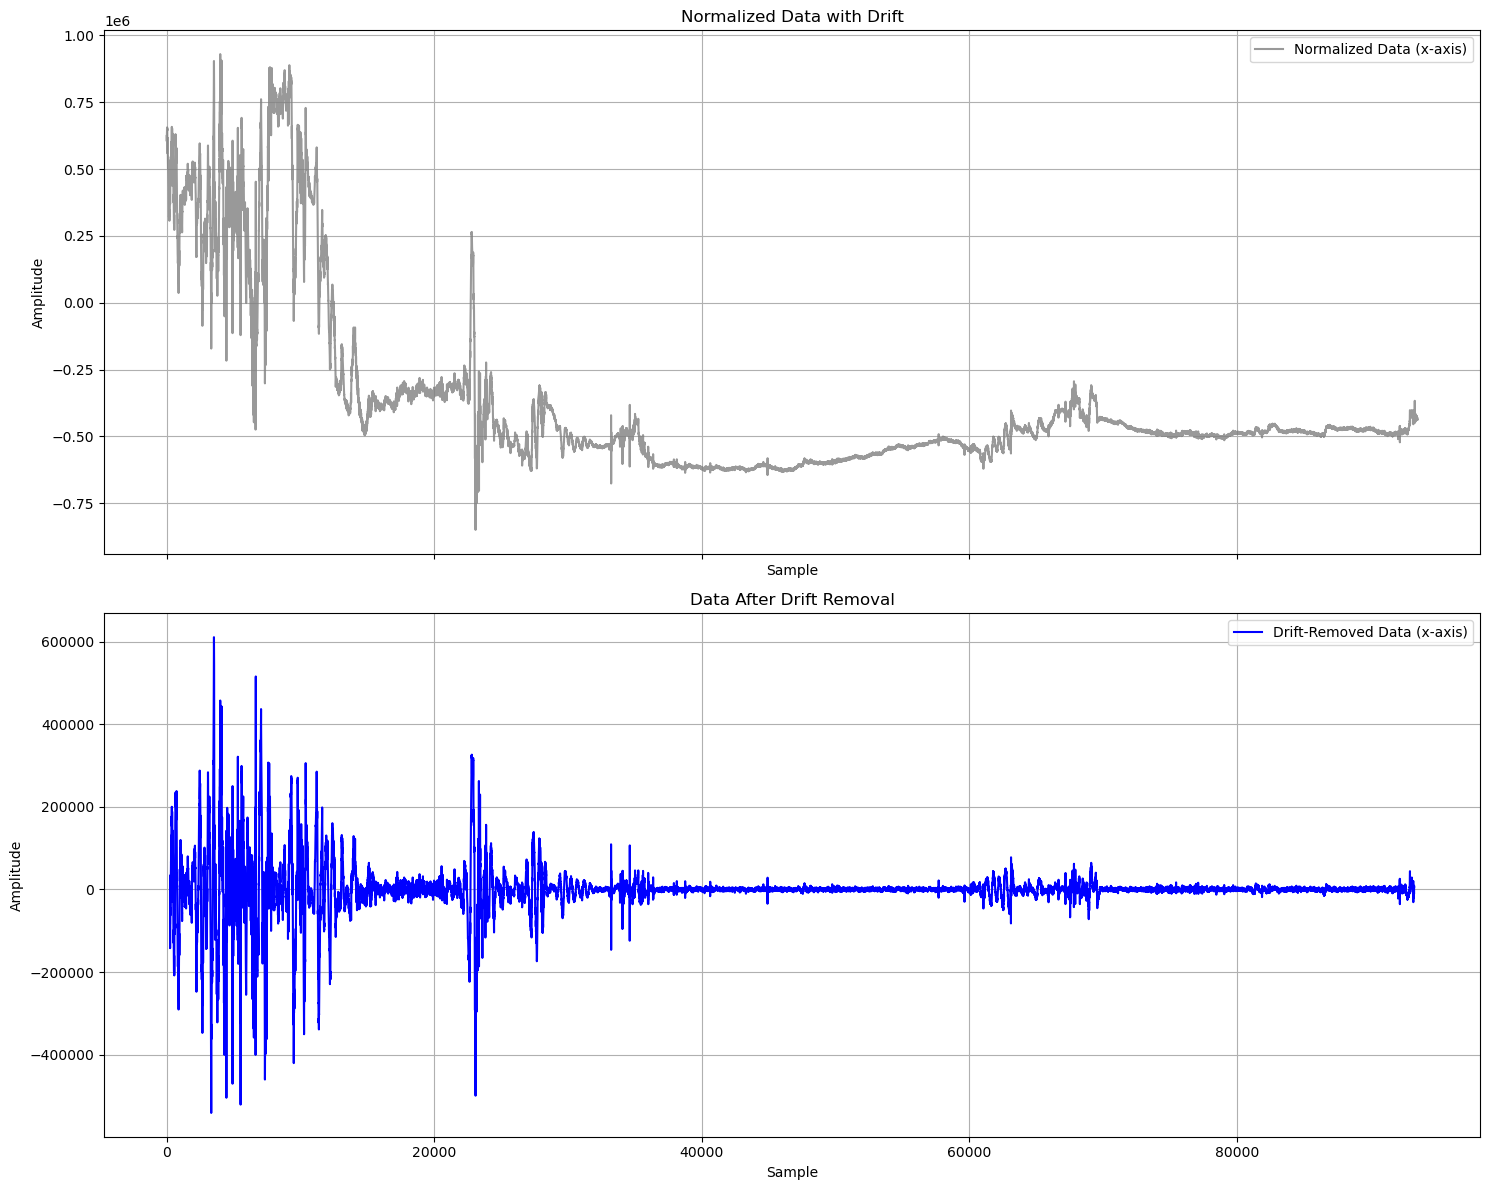

In [9]:
import matplotlib.pyplot as plt

# Assuming df_accel_normalized is your normalized DataFrame
# and df_no_drift is your drift-removed DataFrame

if df_no_drift is not None and df_accel is not None:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

    # Plot 1: Normalized data with drift
    ax1.plot(df_accel['x'], label='Normalized Data (x-axis)', color='gray', alpha=0.8)
    ax1.set_title('Normalized Data with Drift')
    ax1.set_xlabel('Sample')
    ax1.set_ylabel('Amplitude')
    ax1.legend()
    ax1.grid(True)
    
    # Plot 2: Data with drift removed
    ax2.plot(df_no_drift['x'], label='Drift-Removed Data (x-axis)', color='blue')
    ax2.set_title('Data After Drift Removal')
    ax2.set_xlabel('Sample')
    ax2.set_ylabel('Amplitude')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

In [10]:
import numpy as np
import pandas as pd
from scipy.signal import firwin, filtfilt
import matplotlib.pyplot as plt

# Filter parameters from the paper
lowcut = 1.0  # Hz
highcut = 30.0 # Hz
fs = 100.0    # Sampling frequency in Hz
order = 100   # FIR filter order

def fir_bandpass_filter_filtfilt(data, lowcut, highcut, fs, order):
    """
    Designs and applies a bandpass FIR filter using filtfilt for a zero-phase response.
    
    Args:
        data (pd.DataFrame): The input data to filter.
        lowcut (float): The low cutoff frequency in Hz.
        highcut (float): The high cutoff frequency in Hz.
        fs (float): The sampling frequency in Hz.
        order (int): The filter order.
    
    Returns:
        pd.DataFrame: The filtered data.
    """
    nyquist = 0.5 * fs
    b = firwin(order + 1, [lowcut, highcut], pass_zero=False, fs=fs)
    
    # Apply the filter using filtfilt
    y = filtfilt(b, 1.0, data.values, axis=0)
    
    # Convert the filtered array back to a DataFrame with the same columns
    df_filtered_fir = pd.DataFrame(y, columns=data.columns)
    
    return df_filtered_fir

if df_no_drift is not None:
    df_filtered_fir = fir_bandpass_filter_filtfilt(df_no_drift, lowcut, highcut, fs, order)
    print("Data filtered successfully with a zero-phase FIR filter.")
    print(df_filtered_fir.head())

Data filtered successfully with a zero-phase FIR filter.
              x              y             z
0  -1972.245801     161.427440  -3699.309893
1  22603.888668  -38698.910212  18345.339070
2  26029.148318 -142962.438389  31374.476291
3  -5715.321007 -282398.644486  11300.988774
4 -53871.785091 -359443.851294 -45761.329400


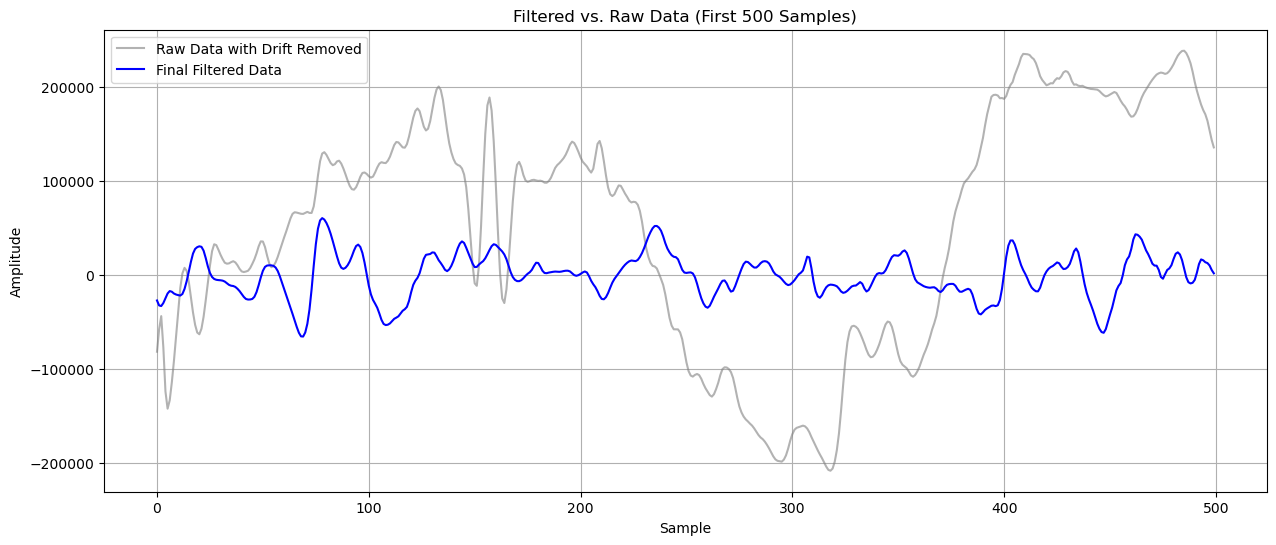

In [11]:
import matplotlib.pyplot as plt

# Get the starting index of the df_no_drift DataFrame
start_index = df_no_drift.index[0]

# Plot the two signals for the first 500 samples
plt.figure(figsize=(15, 6))
plt.plot(df_no_drift['x'].values[:500], label='Raw Data with Drift Removed', color='gray', alpha=0.6)
plt.plot(df_filtered_fir['x'].values[start_index:start_index+500], label='Final Filtered Data', color='blue')

plt.title('Filtered vs. Raw Data (First 500 Samples)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

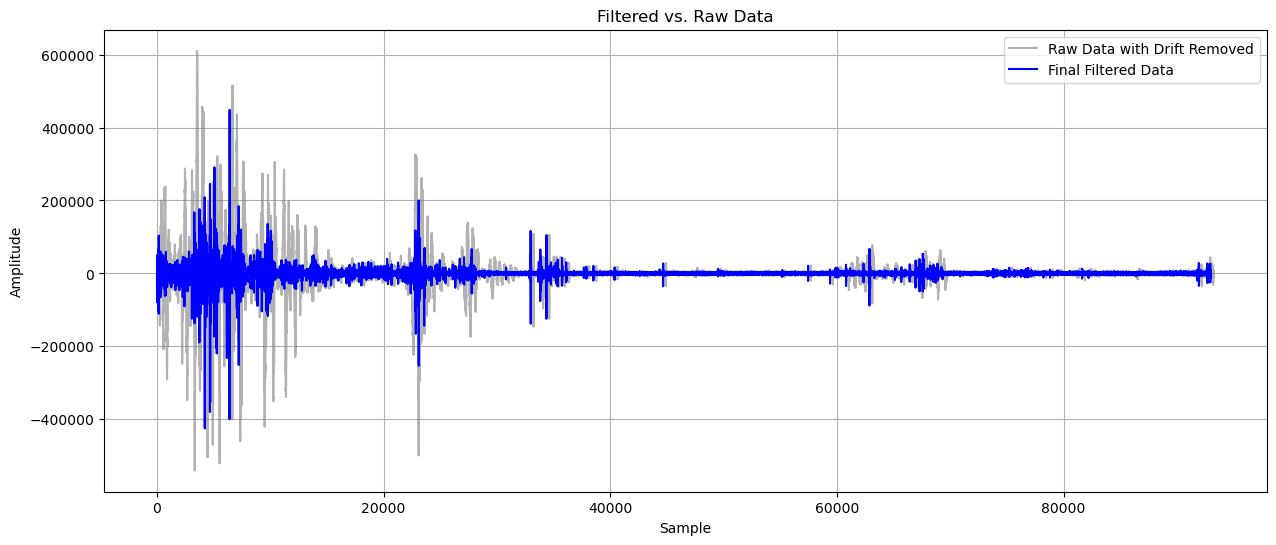

In [12]:
# Plot the two signals for the first 500 samples
plt.figure(figsize=(15, 6))
plt.plot(df_no_drift['x'], label='Raw Data with Drift Removed', color='gray', alpha=0.6)
plt.plot(df_filtered_fir['x'], label='Final Filtered Data', color='blue')

plt.title('Filtered vs. Raw Data')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import numpy as np
from scipy.signal.windows import hamming

# Parameters from the paper
fs = 100.0  # Sampling frequency in Hz
window_duration = 3.0  # seconds
overlap_ratio = 0.90

# Calculate window and step sizes in samples
window_samples = int(window_duration * fs)
overlap_samples = int(overlap_ratio * window_samples)
step_samples = window_samples - overlap_samples

# Check the calculated values
print(f"Window size: {window_samples} samples")
print(f"Overlap: {overlap_samples} samples")
print(f"Step size: {step_samples} samples")

Window size: 300 samples
Overlap: 270 samples
Step size: 30 samples


In [14]:
import numpy as np
from scipy.signal.windows import hamming

# Parameters from the user
window_samples = 300
overlap_samples = 270
step_samples = 30

def apply_sliding_window(data_series, window_samples, step_samples):
    """
    Applies a sliding Hamming window to a time series.
    
    Args:
        data_series (pd.Series): The time series data for one axis.
        window_samples (int): The number of samples in each window.
        step_samples (int): The number of samples to step for each window.

    Returns:
        list: A list of NumPy arrays, where each array is a windowed segment.
    """
    windowed_segments = []
    
    # Create the Hamming window array
    ham_window = hamming(window_samples, sym=True)
    
    # Iterate through the data with the specified step size
    for i in range(0, len(data_series) - window_samples + 1, step_samples):
        segment = data_series[i : i + window_samples].values
        # Apply the Hamming window element-wise
        windowed_segment = segment * ham_window
        windowed_segments.append(windowed_segment)
        
    return windowed_segments

# Apply windowing to each filtered axis
if df_filtered_fir is not None:
    windowed_data = {}
    for axis in ['x', 'y', 'z']:
        windowed_data[axis] = apply_sliding_window(df_filtered_fir[axis], window_samples, step_samples)
        
    print("\nWindowing completed for all axes.")
    print(f"Number of windows for x-axis: {len(windowed_data['x'])}")
    print(f"Shape of the first window: {windowed_data['x'][0].shape}")


Windowing completed for all axes.
Number of windows for x-axis: 3091
Shape of the first window: (300,)


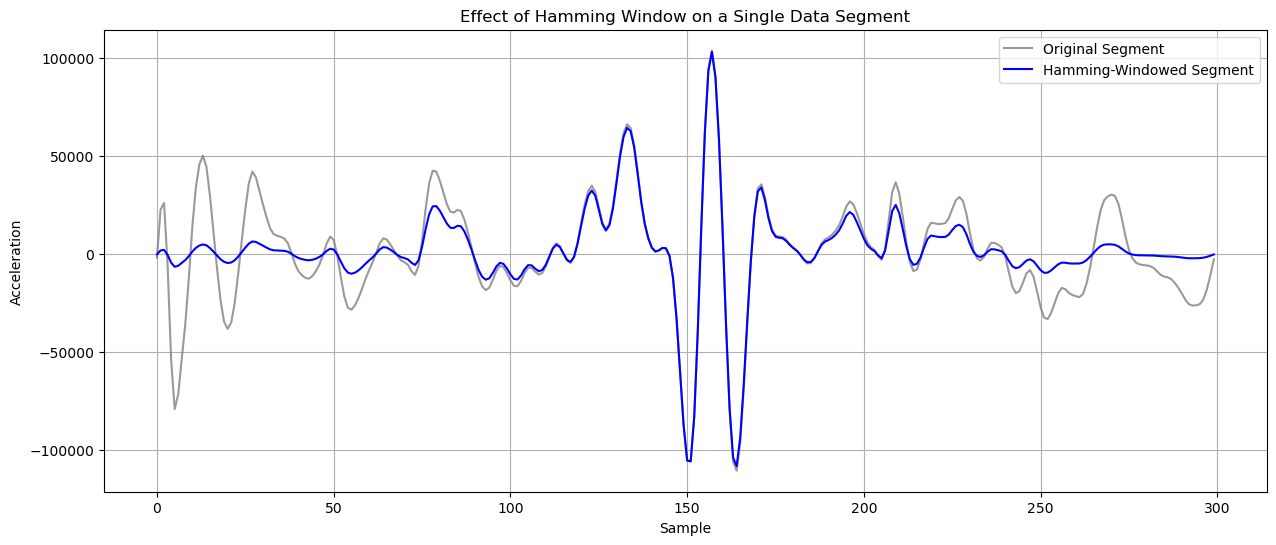

In [15]:
# Get the first segment of the filtered data before windowing
first_segment = df_filtered_fir['x'].values[0:window_samples]

# Apply the Hamming window to this segment
first_windowed_segment = first_segment * hamming(window_samples, sym=True)

# Plot both the original and windowed segments for comparison
plt.figure(figsize=(15, 6))
plt.plot(first_segment, label='Original Segment', color='gray', alpha=0.8)
plt.plot(first_windowed_segment, label='Hamming-Windowed Segment', color='blue')
plt.title('Effect of Hamming Window on a Single Data Segment')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

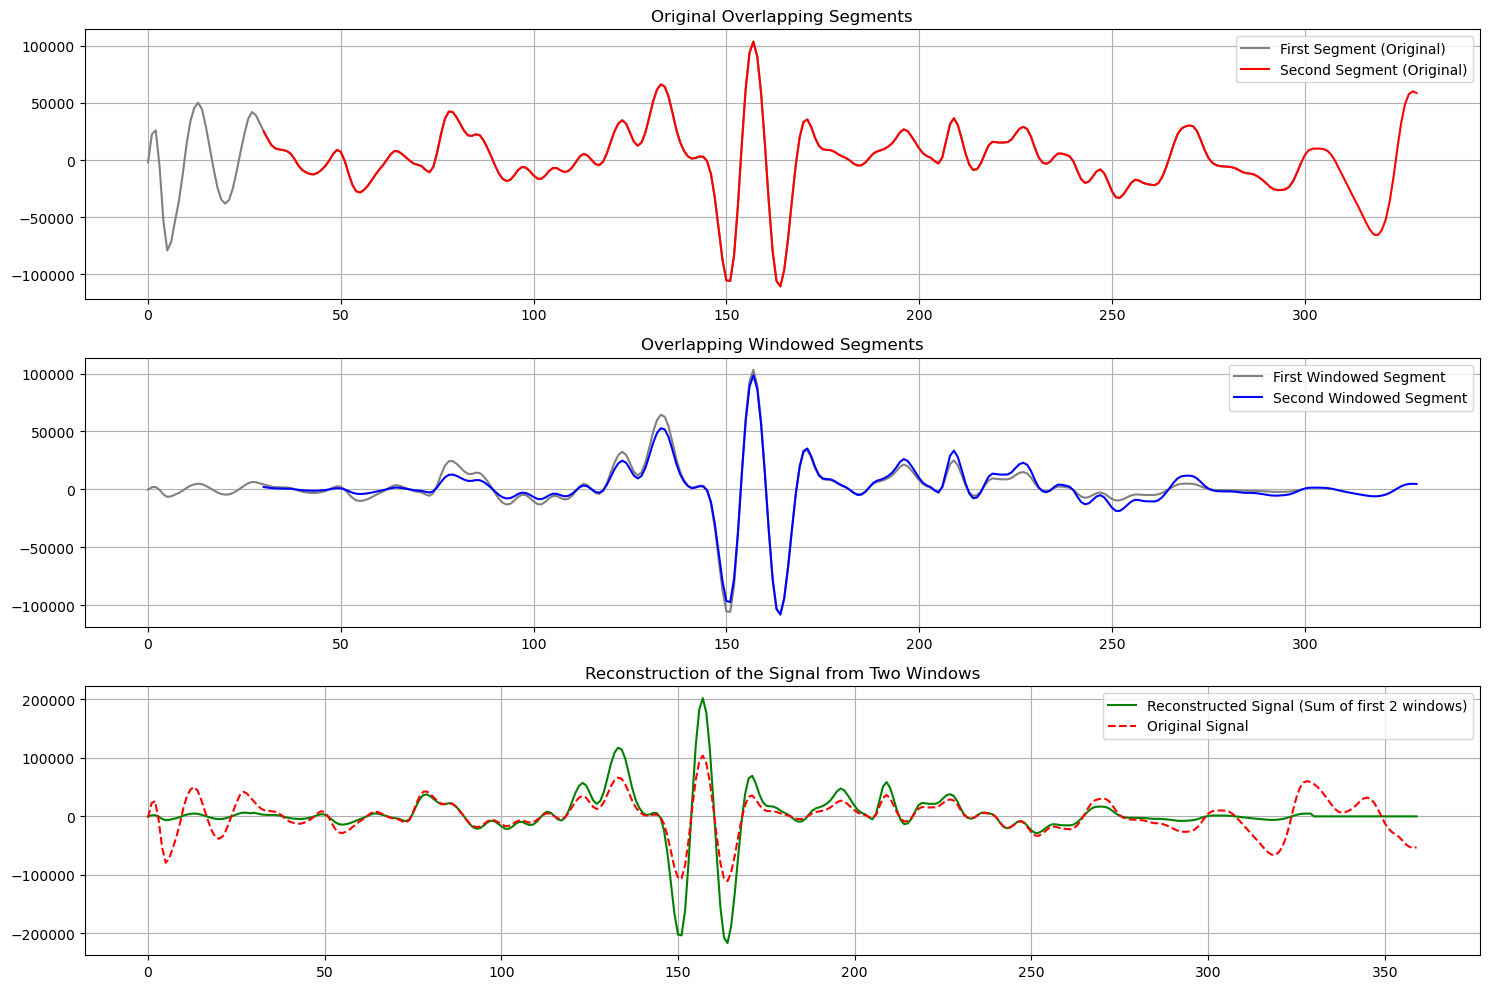

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import hamming

# Parameters from your code
window_samples = 300
overlap_samples = 270
step_samples = 30

# Get the first three windows from your filtered data for visualization
first_window = df_filtered_fir['x'].values[0:window_samples]
second_window = df_filtered_fir['x'].values[step_samples:step_samples + window_samples]
third_window = df_filtered_fir['x'].values[2*step_samples:2*step_samples + window_samples]

# Create the Hamming window array
ham_window = hamming(window_samples, sym=True)

# Apply the window to each segment
first_windowed = first_window * ham_window
second_windowed = second_window * ham_window
third_windowed = third_window * ham_window

# Plot the individual windows and their interaction
plt.figure(figsize=(15, 10))

# Plot 1: First and second raw segments
plt.subplot(3, 1, 1)
plt.plot(np.arange(0, window_samples), first_window, label='First Segment (Original)', color='gray')
plt.plot(np.arange(step_samples, step_samples + window_samples), second_window, label='Second Segment (Original)', color='red')
plt.title('Original Overlapping Segments')
plt.legend()
plt.grid(True)

# Plot 2: First and second windowed segments
plt.subplot(3, 1, 2)
plt.plot(np.arange(0, window_samples), first_windowed, label='First Windowed Segment', color='gray')
plt.plot(np.arange(step_samples, step_samples + window_samples), second_windowed, label='Second Windowed Segment', color='blue')
plt.title('Overlapping Windowed Segments')
plt.legend()
plt.grid(True)

# Plot 3: A simple reconstruction of the first two windowed segments
# This shows how the overlap recovers the tapered data
plt.subplot(3, 1, 3)
reconstructed_signal = np.zeros(2 * step_samples + window_samples)
reconstructed_signal[0:window_samples] += first_windowed
reconstructed_signal[step_samples:step_samples + window_samples] += second_windowed

plt.plot(reconstructed_signal, label='Reconstructed Signal (Sum of first 2 windows)', color='green')
plt.plot(np.arange(0, 2 * step_samples + window_samples), df_filtered_fir['x'].values[0:2 * step_samples + window_samples], label='Original Signal', linestyle='--', color='red')
plt.title('Reconstruction of the Signal from Two Windows')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
def reconstruct_signal(data_series, window_samples, step_samples):
        total_length = len(data_series)
        reconstructed_signal = np.zeros(total_length)
        sum_of_windows = np.zeros(total_length)
        
        # Iterate through segments and sum them up
        for i in range(0, total_length - window_samples + 1, step_samples):
            segment = data_series.values[i : i + window_samples]
            windowed_segment = segment * ham_window
            reconstructed_signal[i : i + window_samples] += windowed_segment
            sum_of_windows[i : i + window_samples] += ham_window
        
        # Avoid division by zero
        sum_of_windows[sum_of_windows == 0] = 1e-6
        
        # Normalize the signal by the sum of overlapping windows
        reconstructed_signal /= sum_of_windows
        
        return reconstructed_signal

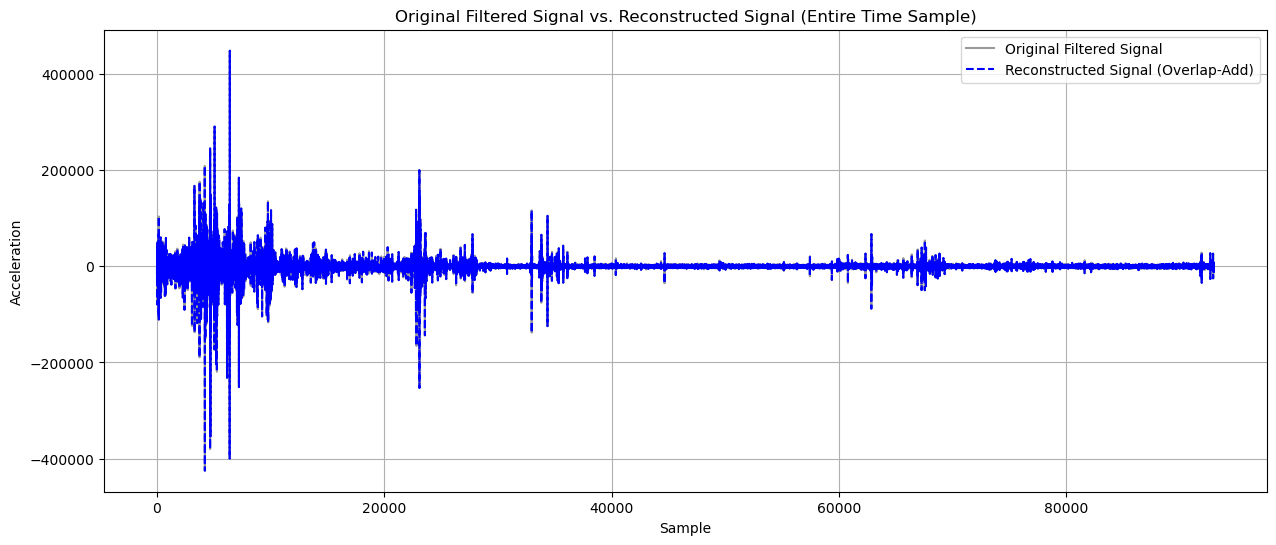

In [18]:
# Reconstruct the signal for the x-axis
reconstructed_signal_x = reconstruct_signal(df_filtered_fir['x'], window_samples, step_samples)

# Plot the original vs. reconstructed signal
plt.figure(figsize=(15, 6))
plt.plot(df_filtered_fir['x'], label='Original Filtered Signal', color='gray', alpha=0.8)
plt.plot(reconstructed_signal_x, label='Reconstructed Signal (Overlap-Add)', color='blue', linestyle='--')
plt.title('Original Filtered Signal vs. Reconstructed Signal (Entire Time Sample)')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# from scipy.signal.windows import boxcar

# def apply_sliding_window_with_boxcar(data_series, window_samples, step_samples):
#     """
#     Applies a sliding boxcar window to a time series.
#     """
#     windowed_segments = []
#     boxcar_window = boxcar(window_samples)
    
#     for i in range(0, len(data_series) - window_samples + 1, step_samples):
#         segment = data_series[i : i + window_samples].values
#         windowed_segment = segment * boxcar_window
#         windowed_segments.append(windowed_segment)
        
#     return windowed_segments

# # Get the first segment with a boxcar window
# first_segment_boxcar = apply_sliding_window_with_boxcar(df_filtered_fir['x'], window_samples, step_samples)[0]

# # Plot the original and boxcar-windowed segments for comparison
# plt.figure(figsize=(15, 6))
# plt.plot(first_segment, label='Original Segment', color='gray', alpha=0.8)
# plt.plot(first_segment_boxcar, label='Boxcar-Windowed Segment', color='green')
# plt.title('Effect of Boxcar Window')
# plt.xlabel('Sample')
# plt.ylabel('Acceleration')
# plt.legend()
# plt.grid(True)
# plt.show()

PSD calculation completed for all windows.
Example result for the first window on the x-axis:
Peak Frequency (3-8 Hz): 8.00 Hz
Peak Power: 12278611076.32
Label: tremor


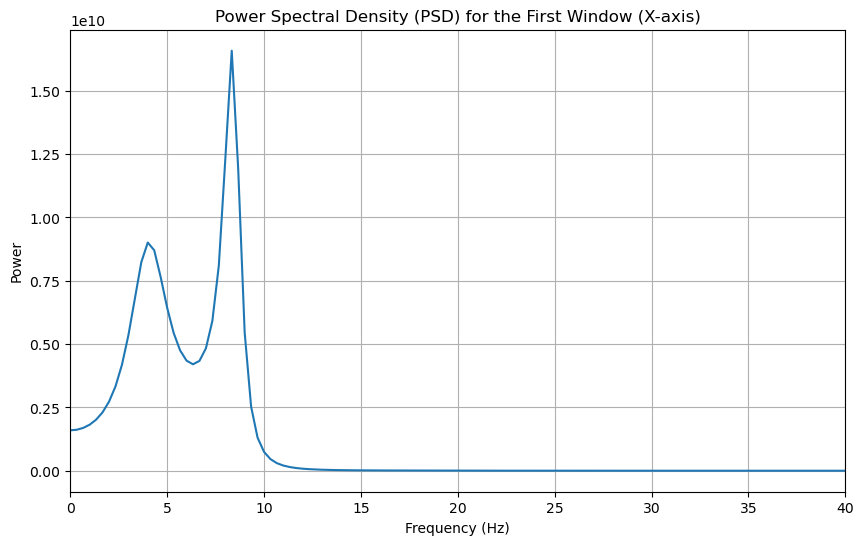

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spectrum import pburg

# Define the function to calculate the PSD using the Berg method
def calculate_psd_berg(segment, fs, order):
    """
    Calculates the Power Spectral Density (PSD) using the Berg method.
    
    Args:
        segment (np.ndarray): A single windowed data segment.
        fs (float): The sampling frequency in Hz.
        order (int): The order of the autoregressive model.
        
    Returns:
        tuple: A tuple containing the power spectrum (PSD) and the corresponding frequencies.
    """
    # The pburg function returns an object containing the PSD
    p = pburg(segment, order=order, scale_by_freq=False)
    
    # Get the power and frequency values
    psd_vals = p.psd
    # Corrected: Convert the frequencies list to a NumPy array before multiplication
    freqs = np.array(p.frequencies()) * fs
    
    return psd_vals, freqs

# Parameters for PSD calculation
fs = 100.0
order = 6

if 'windowed_data' in locals() and windowed_data:
    psd_results = {}
    
    for axis in ['x', 'y', 'z']:
        psd_results[axis] = []
        for segment in windowed_data[axis]:
            # Calculate PSD for the segment
            psd_vals, freqs = calculate_psd_berg(segment, fs, order)
            
            # Find the peak frequency within the 3-8 Hz range
            tremor_freqs = freqs[(freqs >= 3) & (freqs <= 8)]
            tremor_psd = psd_vals[(freqs >= 3) & (freqs <= 8)]
            
            label = 'non-tremor'
            if len(tremor_psd) > 0:
                peak_power_index = np.argmax(tremor_psd)
                peak_freq = tremor_freqs[peak_power_index]
                peak_power = tremor_psd[peak_power_index]
                label = 'tremor'
            else:
                peak_freq = np.nan
                peak_power = np.nan
            
            psd_results[axis].append({
                'psd': psd_vals,
                'freqs': freqs,
                'peak_freq': peak_freq,
                'peak_power': peak_power,
                'label': label
            })
            
print("PSD calculation completed for all windows.")
print("Example result for the first window on the x-axis:")
print(f"Peak Frequency (3-8 Hz): {psd_results['x'][0]['peak_freq']:.2f} Hz")
print(f"Peak Power: {psd_results['x'][0]['peak_power']:.2f}")
print(f"Label: {psd_results['x'][0]['label']}")

# Plot the PSD of the first window for visualization
plt.figure(figsize=(10, 6))
plt.plot(psd_results['x'][0]['freqs'], psd_results['x'][0]['psd'])
plt.title('Power Spectral Density (PSD) for the First Window (X-axis)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0, 40)
plt.grid(True)
plt.show()

In [43]:
import pandas as pd

# Create a list to hold the data for the DataFrame
data_list = []

# Iterate through each axis and each segment to extract the results
for axis in ['x', 'y', 'z']:
    for i, result in enumerate(psd_results[axis]):
        data_list.append({
            'segment_id': i,
            'axis': axis,
            'peak_freq_Hz': result['peak_freq'],
            'peak_power': result['peak_power'],
            'label': result['label']
        })

# Create the DataFrame
df_features = pd.DataFrame(data_list)

print("DataFrame created successfully.")
print("\nFirst 5 rows of the DataFrame:")
print(df_features.head())
print("\nLast 5 rows of the DataFrame:")
print(df_features.tail())
print("\nDataFrame Shape:", df_features.shape)

DataFrame created successfully.

First 5 rows of the DataFrame:
   segment_id axis  peak_freq_Hz    peak_power   label
0           0    x      8.000000  1.227861e+10  tremor
1           1    x      8.000000  1.055472e+10  tremor
2           2    x      8.000000  5.750896e+09  tremor
3           3    x      3.333333  4.791050e+09  tremor
4           4    x      3.000000  8.571837e+09  tremor

Last 5 rows of the DataFrame:
      segment_id axis  peak_freq_Hz    peak_power   label
9268        3086    z      3.666667  1.881440e+08  tremor
9269        3087    z      4.000000  2.090844e+08  tremor
9270        3088    z      4.000000  2.106365e+08  tremor
9271        3089    z      4.000000  2.029591e+08  tremor
9272        3090    z      3.666667  2.108777e+08  tremor

DataFrame Shape: (9273, 5)


In [44]:
print(df_features[df_features['label'] == 'non-tremor'])

Empty DataFrame
Columns: [segment_id, axis, peak_freq_Hz, peak_power, label]
Index: []


In [45]:
# 1. Define the threshold based on the author's heuristic: T = max_peak_power / 10
# Note: The original paper's heuristic is for uncalibrated data, but we'll apply it here
# to demonstrate the concept on our normalized data.
max_peak_power = df_features['peak_power'].max()
threshold = max_peak_power / 10

# 2. Refine the labels based on the threshold
# A window is now only a 'tremor' if it was initially labeled 'tremor' AND its peak power
# is above the calculated threshold.
df_features['final_label'] = 'non-tremor'
df_features.loc[(df_features['label'] == 'tremor') & (df_features['peak_power'] > threshold), 'final_label'] = 'tremor'

print("Final thresholding complete. The 'final_label' column now contains the refined results.")
print("Number of tremor windows detected:", len(df_features[df_features['final_label'] == 'tremor']))
print("Number of non-tremor windows detected:", len(df_features[df_features['final_label'] == 'non-tremor']))
print("\nFirst 10 rows of the refined DataFrame:")
print(df_features.head(10))

Final thresholding complete. The 'final_label' column now contains the refined results.
Number of tremor windows detected: 45
Number of non-tremor windows detected: 9228

First 10 rows of the refined DataFrame:
   segment_id axis  peak_freq_Hz    peak_power   label final_label
0           0    x      8.000000  1.227861e+10  tremor  non-tremor
1           1    x      8.000000  1.055472e+10  tremor  non-tremor
2           2    x      8.000000  5.750896e+09  tremor  non-tremor
3           3    x      3.333333  4.791050e+09  tremor  non-tremor
4           4    x      3.000000  8.571837e+09  tremor  non-tremor
5           5    x      3.000000  1.347587e+10  tremor  non-tremor
6           6    x      3.000000  1.315665e+10  tremor  non-tremor
7           7    x      3.000000  9.673883e+09  tremor  non-tremor
8           8    x      3.000000  5.838949e+09  tremor  non-tremor
9           9    x      3.000000  3.299460e+09  tremor  non-tremor


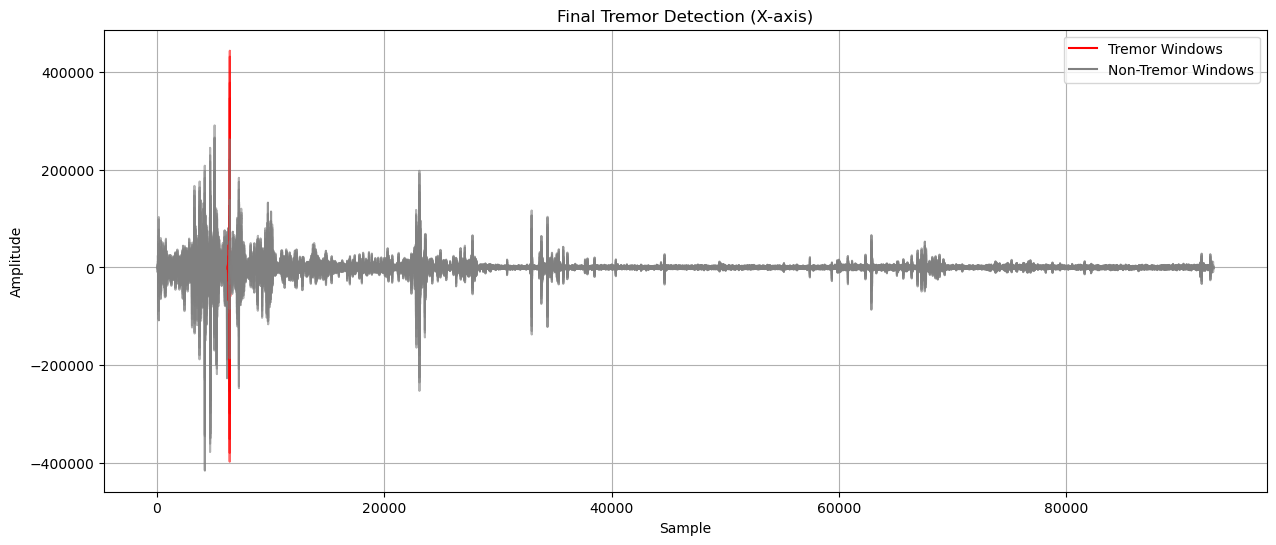

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_features and windowed_data are available from previous steps.

if 'df_features' in locals() and df_features is not None and 'windowed_data' in locals() and windowed_data is not None:
    
    # Filter for the x-axis data
    df_x_axis = df_features[df_features['axis'] == 'x'].copy()
    
    plt.figure(figsize=(15, 6))
    
    # Plot tremor and non-tremor windows separately
    for _, row in df_x_axis.iterrows():
        segment_id = int(row['segment_id'])
        label = row['final_label']
        segment_data = windowed_data['x'][segment_id]
        
        # Calculate the starting sample for the plot
        window_samples = len(segment_data)
        step_samples = 30
        start_sample = segment_id * step_samples
        
        # Plot in a different color based on the label
        if label == 'tremor':
            plt.plot(np.arange(start_sample, start_sample + window_samples), segment_data, color='red', alpha=0.6)
        else:
            plt.plot(np.arange(start_sample, start_sample + window_samples), segment_data, color='gray', alpha=0.6)
            
    # Add a legend for the two types of windows
    plt.plot([], [], color='red', label='Tremor Windows')
    plt.plot([], [], color='gray', label='Non-Tremor Windows')
    
    plt.title('Final Tremor Detection (X-axis)')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

In [47]:
import pandas as pd

# Create a copy of the DataFrame to avoid modifying the original
df_final_features = df_features.copy()

# The paper specifies that for non-tremor windows, the frequency should be 1.
# We will use the 'final_label' column to perform this update.
df_final_features.loc[df_final_features['final_label'] == 'non-tremor', 'peak_freq_Hz'] = 1.0

# Count the number of changes made
num_changes = (df_final_features['peak_freq_Hz'] == 1.0).sum()

print(f"Updated {num_changes} non-tremor windows with a peak frequency of 1.0 Hz.")
print("\nFirst 10 rows of the final DataFrame:")
print(df_final_features.head(10))

Updated 9228 non-tremor windows with a peak frequency of 1.0 Hz.

First 10 rows of the final DataFrame:
   segment_id axis  peak_freq_Hz    peak_power   label final_label
0           0    x           1.0  1.227861e+10  tremor  non-tremor
1           1    x           1.0  1.055472e+10  tremor  non-tremor
2           2    x           1.0  5.750896e+09  tremor  non-tremor
3           3    x           1.0  4.791050e+09  tremor  non-tremor
4           4    x           1.0  8.571837e+09  tremor  non-tremor
5           5    x           1.0  1.347587e+10  tremor  non-tremor
6           6    x           1.0  1.315665e+10  tremor  non-tremor
7           7    x           1.0  9.673883e+09  tremor  non-tremor
8           8    x           1.0  5.838949e+09  tremor  non-tremor
9           9    x           1.0  3.299460e+09  tremor  non-tremor


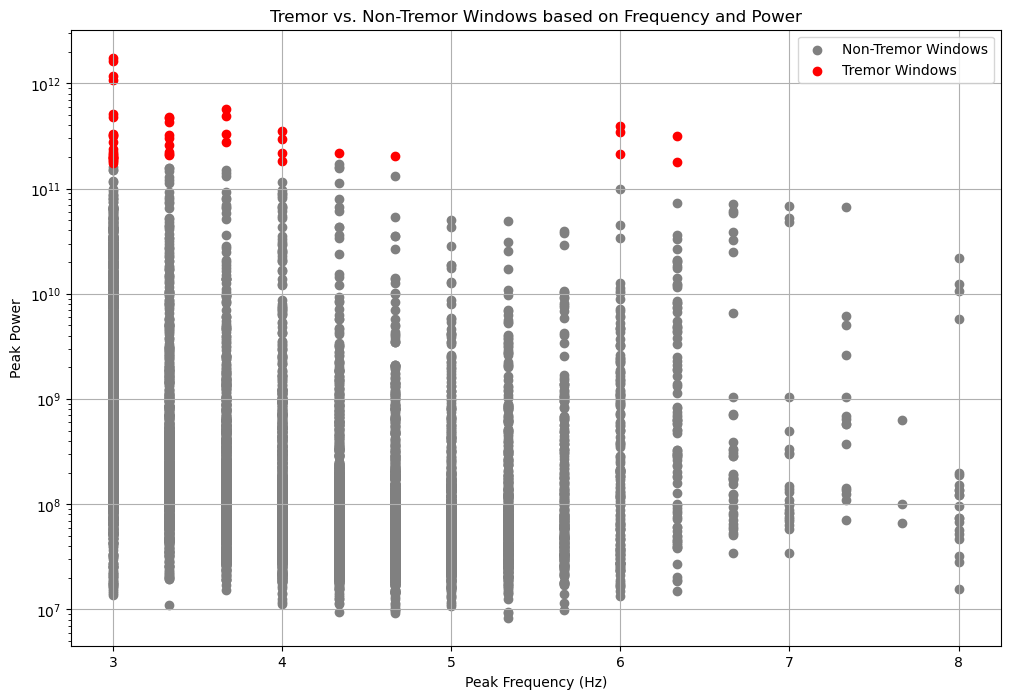

In [48]:
import matplotlib.pyplot as plt

# Assume df_features is the DataFrame with the 'final_label' column.

# Separate the tremor and non-tremor data for easier plotting
df_tremor = df_features[df_features['final_label'] == 'tremor']
df_non_tremor = df_features[df_features['final_label'] == 'non-tremor']

plt.figure(figsize=(12, 8))

# Plot the non-tremor points first (in a subdued color)
plt.scatter(
    df_non_tremor['peak_freq_Hz'],
    df_non_tremor['peak_power'],
    c='gray',
    label='Non-Tremor Windows'
)

# Plot the tremor points (in a distinct color)
plt.scatter(
    df_tremor['peak_freq_Hz'],
    df_tremor['peak_power'],
    c='red',
    label='Tremor Windows'
)

plt.title('Tremor vs. Non-Tremor Windows based on Frequency and Power')
plt.xlabel('Peak Frequency (Hz)')
plt.ylabel('Peak Power')
plt.yscale('log') # Using a log scale for power for better visibility
plt.legend()
plt.grid(True)
plt.show()

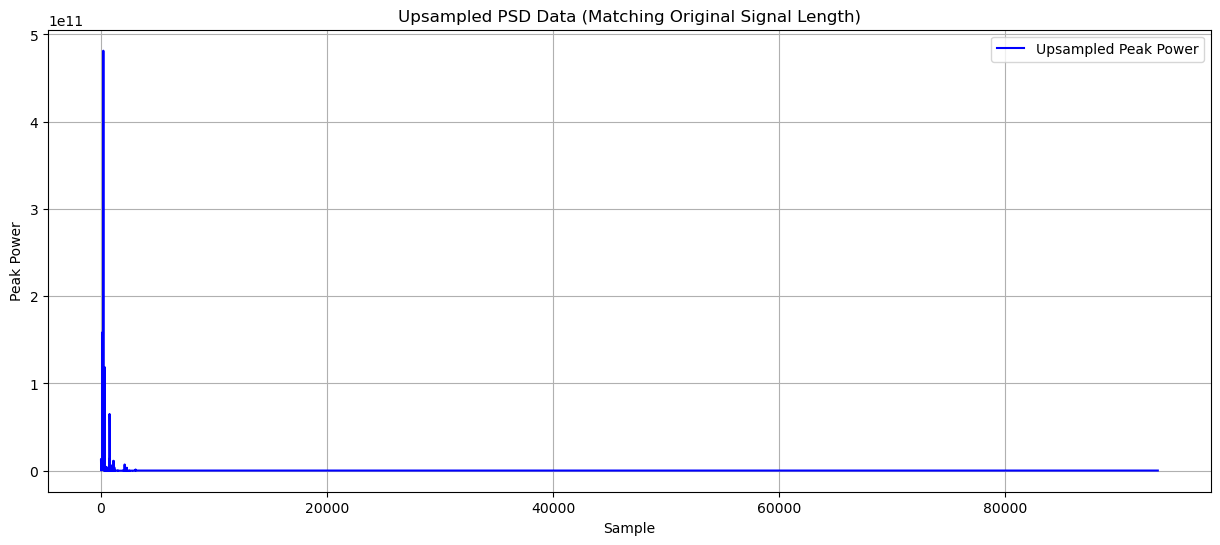

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We'll use the 'segment_id' as the original time axis for upsampling.
original_time_points = df_features['segment_id'].values

# The data to be upsampled will be the peak power values.
data_to_upsample = df_features['peak_power'].values

# Create the new, upsampled time axis that matches the length of your original data.
# We'll assume the original data has a length of 9273 samples for this example.
total_samples = len(df_accel)
new_time_axis = np.arange(total_samples)

# Perform the upsampling using linear interpolation.
upsampled_peak_power = np.interp(new_time_axis, original_time_points, data_to_upsample)

# Plot the result.
plt.figure(figsize=(15, 6))
plt.plot(new_time_axis, upsampled_peak_power, label='Upsampled Peak Power', color='blue')
plt.title('Upsampled PSD Data (Matching Original Signal Length)')
plt.xlabel('Sample')
plt.ylabel('Peak Power')
plt.grid(True)
plt.legend()
plt.show()

Upsampled data smoothed successfully.


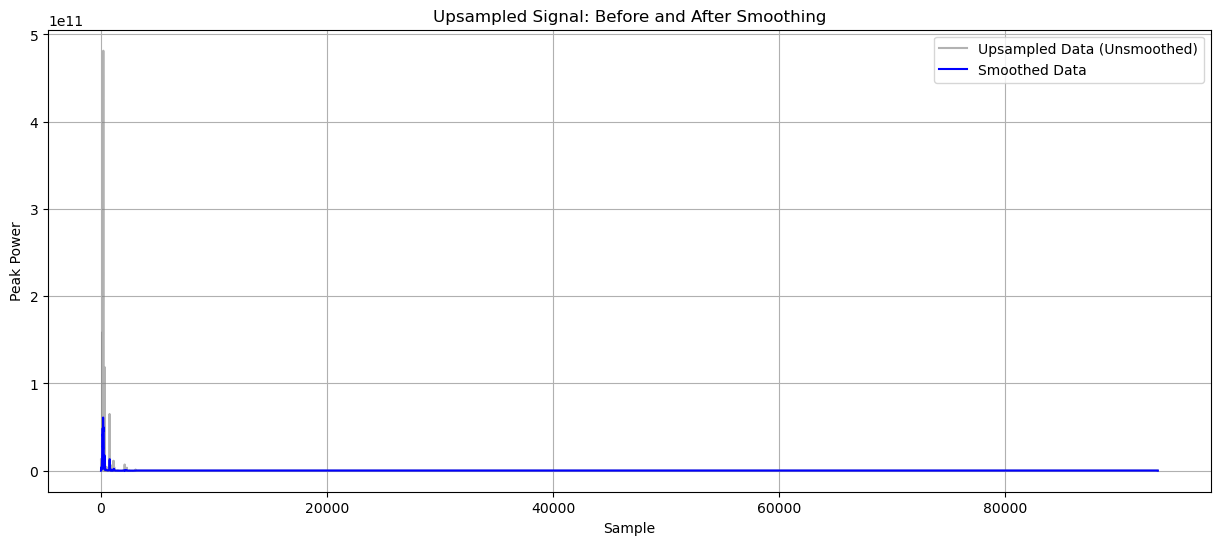

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We assume upsampled_peak_power is the variable from the previous step.
# This code block is self-contained for demonstration.
if 'upsampled_peak_power' in locals() and upsampled_peak_power is not None:
    # Use a moving average filter for smoothing
    moving_average_window = 50

    # Apply the moving average filter to the upsampled data
    upsampled_smoothed = pd.Series(upsampled_peak_power).rolling(
        window=moving_average_window,
        center=True
    ).mean().fillna(0) # Fill NaN values with 0 at the edges

    print("Upsampled data smoothed successfully.")

    # Plot the original upsampled data vs. the smoothed version
    plt.figure(figsize=(15, 6))
    plt.plot(upsampled_peak_power, label='Upsampled Data (Unsmoothed)', color='gray', alpha=0.6)
    plt.plot(upsampled_smoothed, label='Smoothed Data', color='blue')
    plt.title('Upsampled Signal: Before and After Smoothing')
    plt.xlabel('Sample')
    plt.ylabel('Peak Power')
    plt.grid(True)
    plt.legend()
    plt.show()

Combined signal created successfully.


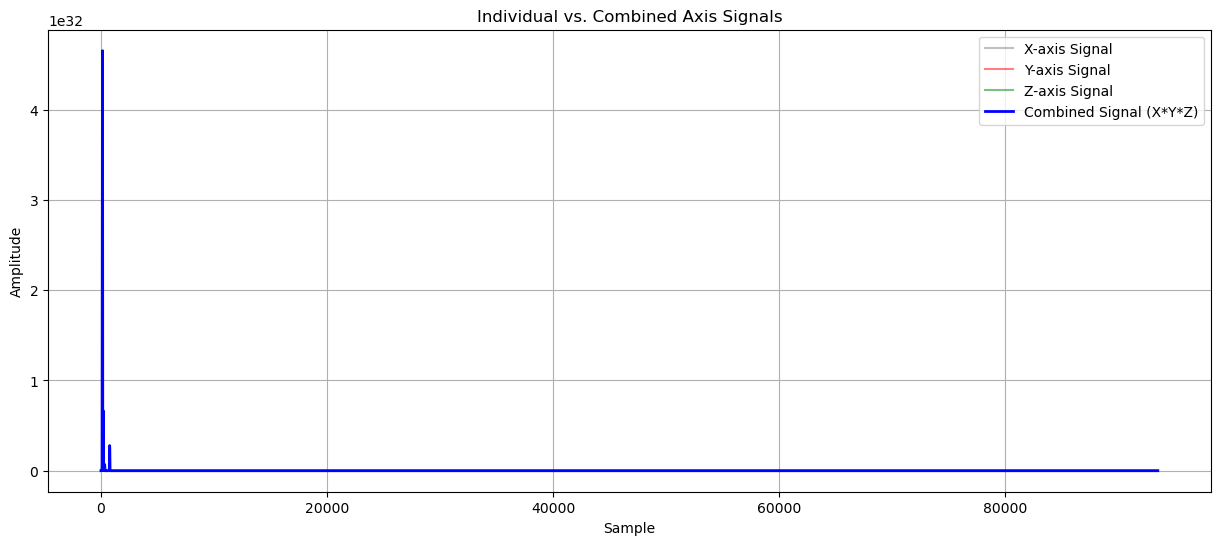

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We assume df_features is the DataFrame with tremor features for all axes.
# For a complete example, we'll re-generate the upsampled data for each axis.
if 'df_features' in locals() and df_features is not None:
    # 1. Get upsampled data for EACH AXIS
    
    # Separate the data by axis
    df_x = df_features[df_features['axis'] == 'x'].copy()
    df_y = df_features[df_features['axis'] == 'y'].copy()
    df_z = df_features[df_features['axis'] == 'z'].copy()
    
    # Get the data to be upsampled (peak power for each axis)
    data_x = df_x['peak_power'].values
    data_y = df_y['peak_power'].values
    data_z = df_z['peak_power'].values
    
    # Get the original time points from the segment IDs
    original_time_points = df_x['segment_id'].values
    total_samples = len(df_accel) # Assuming df_accel is the full length data
    new_time_axis = np.arange(total_samples)

    # Perform the upsampling for EACH AXIS
    upsampled_x = np.interp(new_time_axis, original_time_points, data_x)
    upsampled_y = np.interp(new_time_axis, original_time_points, data_y)
    upsampled_z = np.interp(new_time_axis, original_time_points, data_z)

    # 2. Smooth the upsampled data for EACH AXIS
    moving_average_window = 50
    upsampled_smoothed_x = pd.Series(upsampled_x).rolling(window=moving_average_window, center=True).mean().fillna(0)
    upsampled_smoothed_y = pd.Series(upsampled_y).rolling(window=moving_average_window, center=True).mean().fillna(0)
    upsampled_smoothed_z = pd.Series(upsampled_z).rolling(window=moving_average_window, center=True).mean().fillna(0)
    
    # 3. Multiply the smoothed data from ALL THREE AXES
    combined_signal = upsampled_smoothed_x * upsampled_smoothed_y * upsampled_smoothed_z

    print("Combined signal created successfully.")

    # 4. Plot the individual and combined signals
    plt.figure(figsize=(15, 6))
    plt.plot(upsampled_smoothed_x, label='X-axis Signal', color='gray', alpha=0.5)
    plt.plot(upsampled_smoothed_y, label='Y-axis Signal', color='red', alpha=0.5)
    plt.plot(upsampled_smoothed_z, label='Z-axis Signal', color='green', alpha=0.5)
    plt.plot(combined_signal, label='Combined Signal (X*Y*Z)', color='blue', linewidth=2)
    
    plt.title('Individual vs. Combined Axis Signals')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()

Total number of segments with peak frequency in the 3-8 Hz range: 9273
------------------------------------------------------------


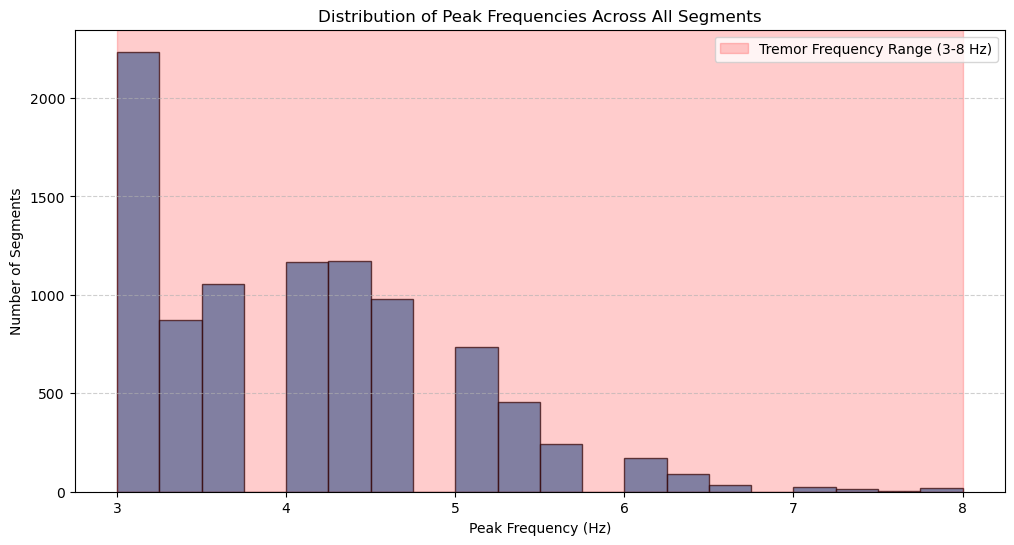

In [22]:
import matplotlib.pyplot as plt

# Filter the DataFrame for segments with peak frequencies between 3 and 8 Hz
tremor_segments = df_features[
    (df_features['peak_freq_Hz'] >= 3) & (df_features['peak_freq_Hz'] <= 8)
]

# Get the total count of these segments
total_tremor_segments = len(tremor_segments)

print(f"Total number of segments with peak frequency in the 3-8 Hz range: {total_tremor_segments}")
print("-" * 60)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(df_features['peak_freq_Hz'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Peak Frequencies Across All Segments')
plt.xlabel('Peak Frequency (Hz)')
plt.ylabel('Number of Segments')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Highlight the tremor frequency range (3-8 Hz)
plt.axvspan(3, 8, color='red', alpha=0.2, label='Tremor Frequency Range (3-8 Hz)')
plt.legend()
plt.show()

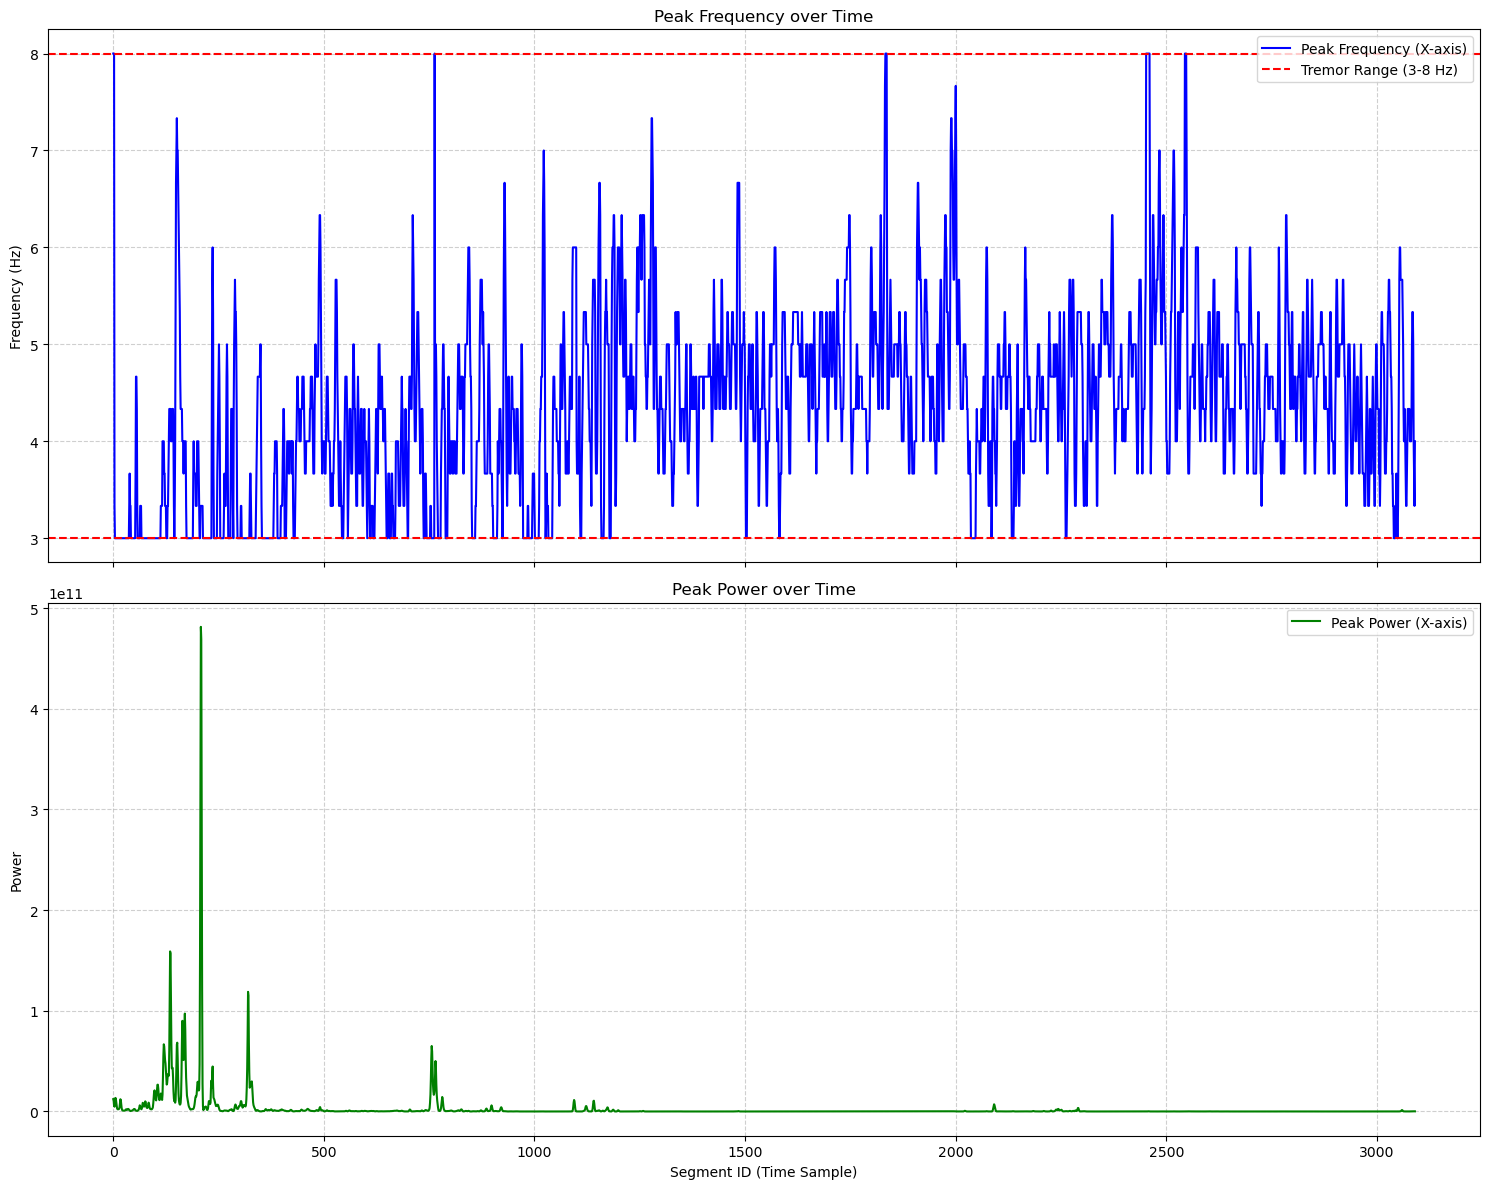

In [23]:
import matplotlib.pyplot as plt

# Create subplots for frequency and power
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Plot 1: Peak Frequency over Time
ax1.plot(df_features[df_features['axis'] == 'x']['segment_id'], 
         df_features[df_features['axis'] == 'x']['peak_freq_Hz'], 
         label='Peak Frequency (X-axis)', color='blue')
ax1.set_title('Peak Frequency over Time')
ax1.set_ylabel('Frequency (Hz)')
ax1.grid(True, linestyle='--', alpha=0.6)

# Highlight the tremor frequency range (3-8 Hz)
ax1.axhline(y=3, color='red', linestyle='--', label='Tremor Range (3-8 Hz)')
ax1.axhline(y=8, color='red', linestyle='--')
ax1.legend()

# Plot 2: Peak Power over Time
ax2.plot(df_features[df_features['axis'] == 'x']['segment_id'], 
         df_features[df_features['axis'] == 'x']['peak_power'], 
         label='Peak Power (X-axis)', color='green')
ax2.set_title('Peak Power over Time')
ax2.set_xlabel('Segment ID (Time Sample)')
ax2.set_ylabel('Power')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend()

plt.tight_layout()
plt.show()

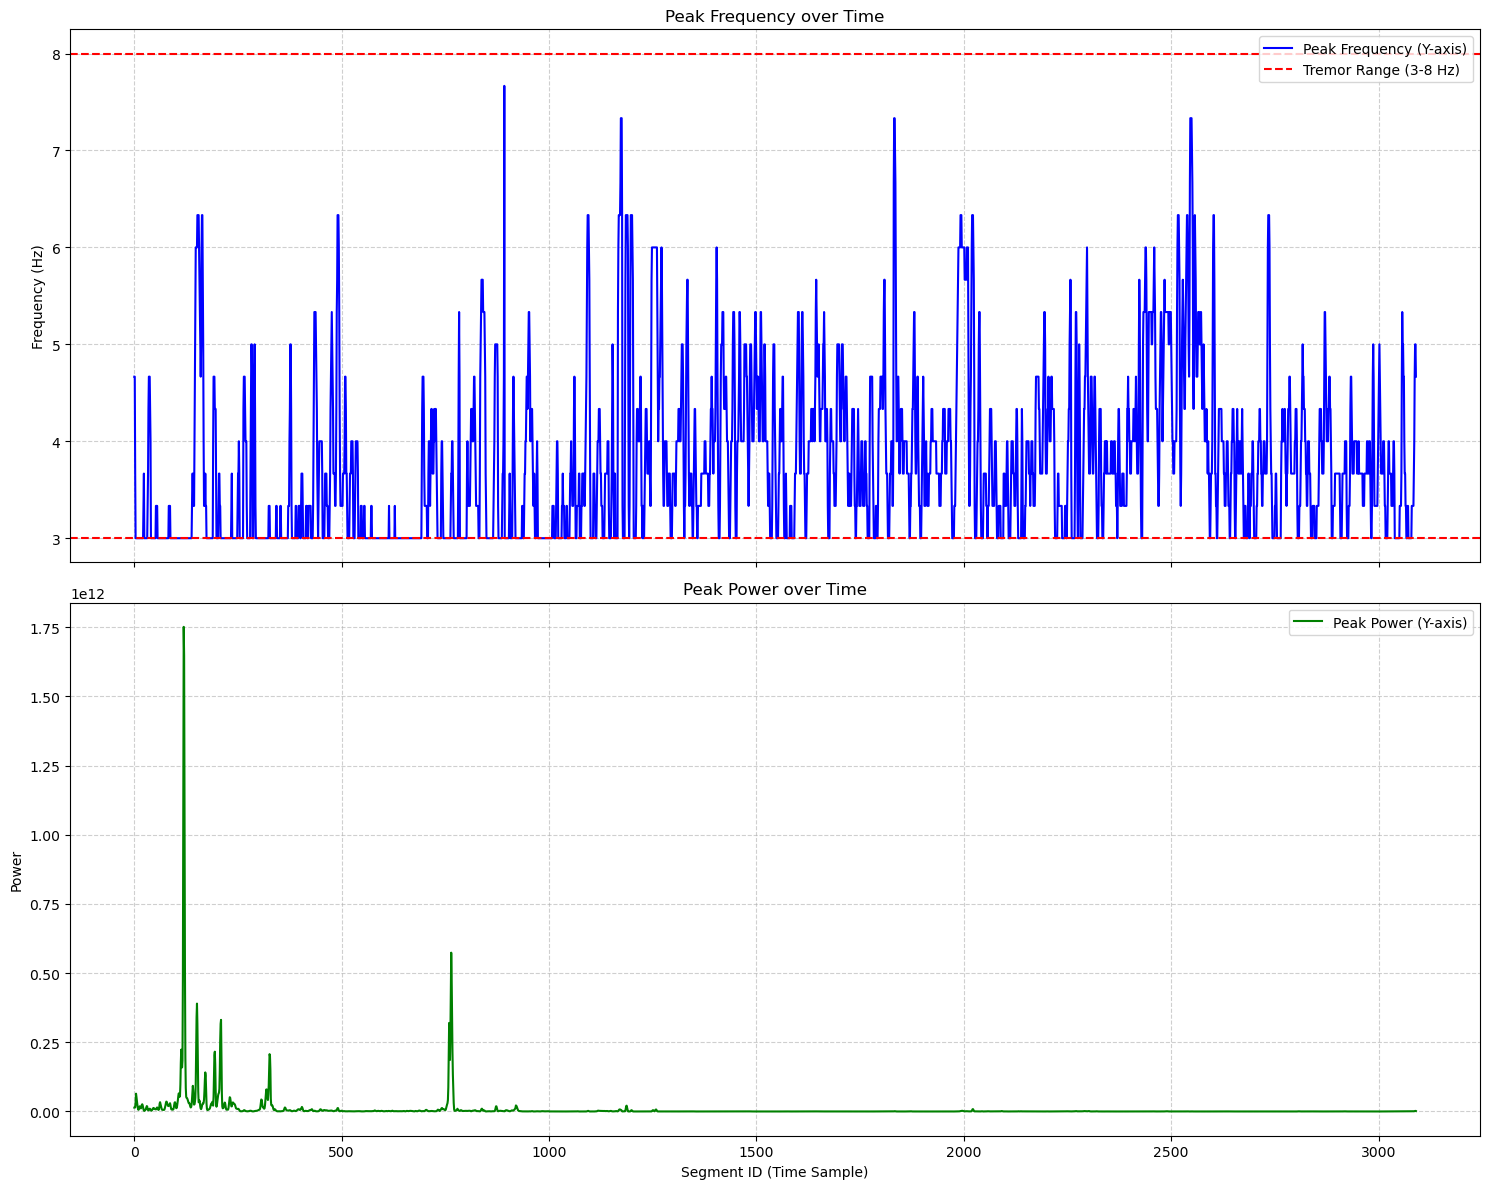

In [24]:
import matplotlib.pyplot as plt

# Create subplots for frequency and power
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Plot 1: Peak Frequency over Time
ax1.plot(df_features[df_features['axis'] == 'y']['segment_id'], 
         df_features[df_features['axis'] == 'y']['peak_freq_Hz'], 
         label='Peak Frequency (Y-axis)', color='blue')
ax1.set_title('Peak Frequency over Time')
ax1.set_ylabel('Frequency (Hz)')
ax1.grid(True, linestyle='--', alpha=0.6)

# Highlight the tremor frequency range (3-8 Hz)
ax1.axhline(y=3, color='red', linestyle='--', label='Tremor Range (3-8 Hz)')
ax1.axhline(y=8, color='red', linestyle='--')
ax1.legend()

# Plot 2: Peak Power over Time
ax2.plot(df_features[df_features['axis'] == 'y']['segment_id'], 
         df_features[df_features['axis'] == 'y']['peak_power'], 
         label='Peak Power (Y-axis)', color='green')
ax2.set_title('Peak Power over Time')
ax2.set_xlabel('Segment ID (Time Sample)')
ax2.set_ylabel('Power')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend()

plt.tight_layout()
plt.show()

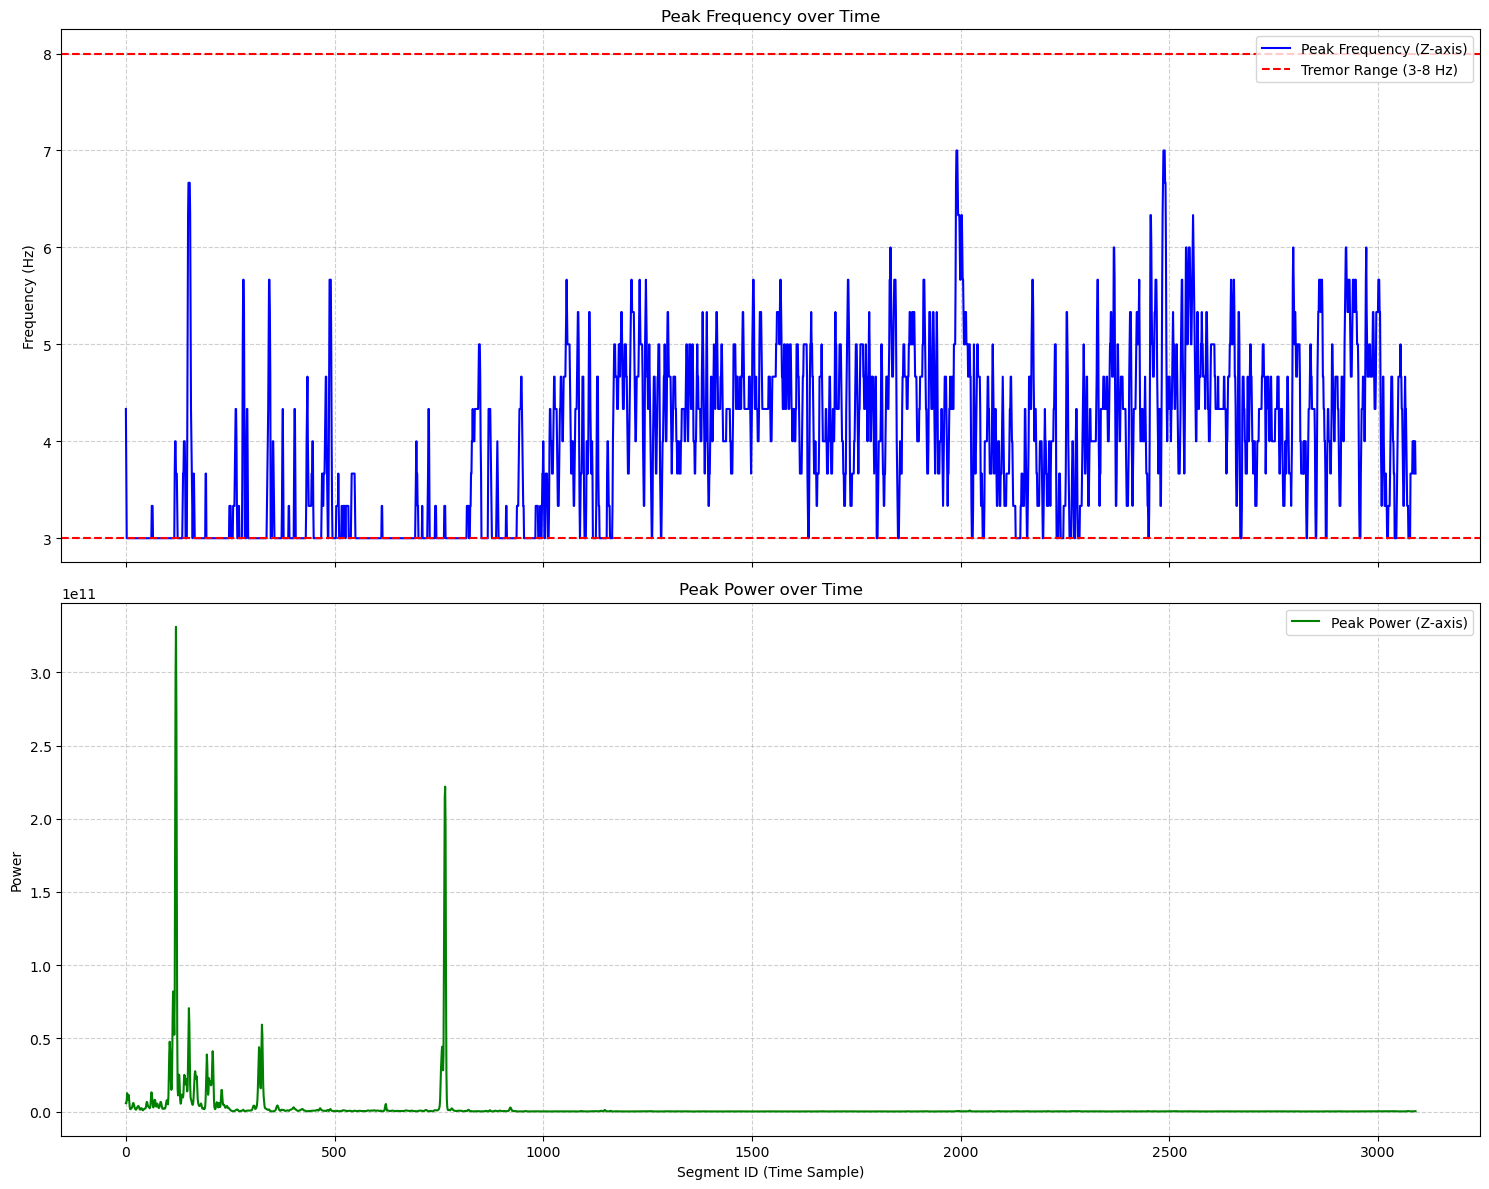

In [25]:
import matplotlib.pyplot as plt

# Create subplots for frequency and power
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Plot 1: Peak Frequency over Time
ax1.plot(df_features[df_features['axis'] == 'z']['segment_id'], 
         df_features[df_features['axis'] == 'z']['peak_freq_Hz'], 
         label='Peak Frequency (Z-axis)', color='blue')
ax1.set_title('Peak Frequency over Time')
ax1.set_ylabel('Frequency (Hz)')
ax1.grid(True, linestyle='--', alpha=0.6)

# Highlight the tremor frequency range (3-8 Hz)
ax1.axhline(y=3, color='red', linestyle='--', label='Tremor Range (3-8 Hz)')
ax1.axhline(y=8, color='red', linestyle='--')
ax1.legend()

# Plot 2: Peak Power over Time
ax2.plot(df_features[df_features['axis'] == 'z']['segment_id'], 
         df_features[df_features['axis'] == 'z']['peak_power'], 
         label='Peak Power (Z-axis)', color='green')
ax2.set_title('Peak Power over Time')
ax2.set_xlabel('Segment ID (Time Sample)')
ax2.set_ylabel('Power')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend()

plt.tight_layout()
plt.show()

Combined PSD calculation completed.
Example combined result for the first window:
Peak Frequency: 4.33 Hz
Peak Power: 676046790836419442987705040896.00


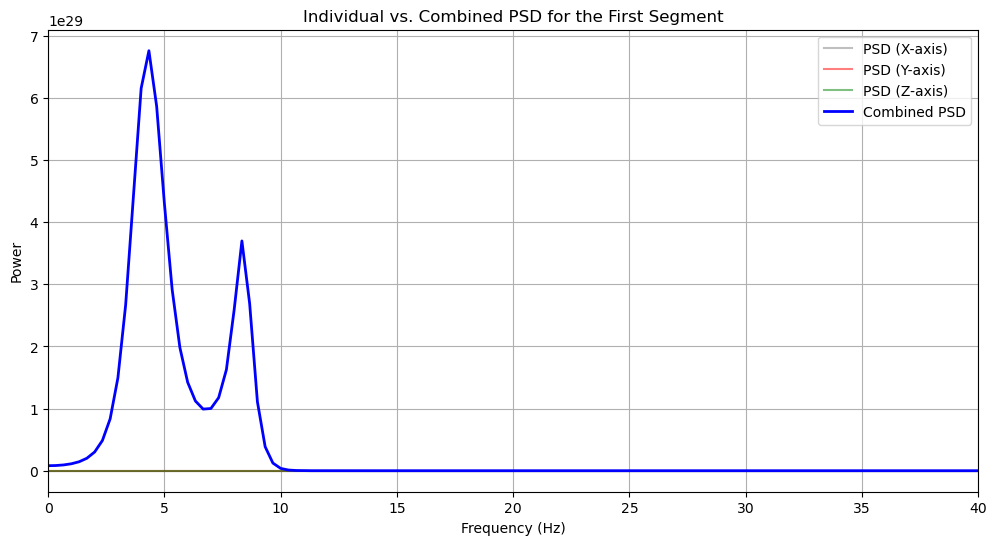

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check if the data is available
if 'psd_results' in locals() and psd_results:
    combined_psd_results = []

    # Get the number of windows from one of the axes
    num_windows = len(psd_results['x'])

    for i in range(num_windows):
        # Access the PSD arrays for the current window from each axis
        psd_x = psd_results['x'][i]['psd']
        psd_y = psd_results['y'][i]['psd']
        psd_z = psd_results['z'][i]['psd']

        # Get the frequency array (they should be the same for all axes)
        freqs = psd_results['x'][i]['freqs']

        # Multiply the PSD profiles element-wise
        combined_psd = psd_x * psd_y * psd_z
        
        # Find the peak frequency within the 3-8 Hz range
        tremor_freqs = freqs[(freqs >= 3) & (freqs <= 8)]
        tremor_psd = combined_psd[(freqs >= 3) & (freqs <= 8)]
        
        if len(tremor_psd) > 0:
            peak_power_index = np.argmax(tremor_psd)
            peak_freq = tremor_freqs[peak_power_index]
            peak_power = tremor_psd[peak_power_index]
        else:
            peak_freq = np.nan
            peak_power = np.nan
        
        combined_psd_results.append({
            'segment_id': i,
            'combined_psd': combined_psd,
            'freqs': freqs,
            'peak_freq_Hz': peak_freq,
            'peak_power': peak_power
        })
    
    print("Combined PSD calculation completed.")
    print("Example combined result for the first window:")
    print(f"Peak Frequency: {combined_psd_results[0]['peak_freq_Hz']:.2f} Hz")
    print(f"Peak Power: {combined_psd_results[0]['peak_power']:.2f}")

    # Plot the individual and combined PSDs for the first window
    plt.figure(figsize=(12, 6))
    plt.plot(psd_results['x'][0]['freqs'], psd_results['x'][0]['psd'], label='PSD (X-axis)', color='gray', alpha=0.5)
    plt.plot(psd_results['y'][0]['freqs'], psd_results['y'][0]['psd'], label='PSD (Y-axis)', color='red', alpha=0.5)
    plt.plot(psd_results['z'][0]['freqs'], psd_results['z'][0]['psd'], label='PSD (Z-axis)', color='green', alpha=0.5)
    plt.plot(combined_psd_results[0]['freqs'], combined_psd_results[0]['combined_psd'], label='Combined PSD', color='blue', linewidth=2)
    
    plt.title('Individual vs. Combined PSD for the First Segment')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.xlim(0, 40)
    plt.legend()
    plt.grid(True)
    plt.show()

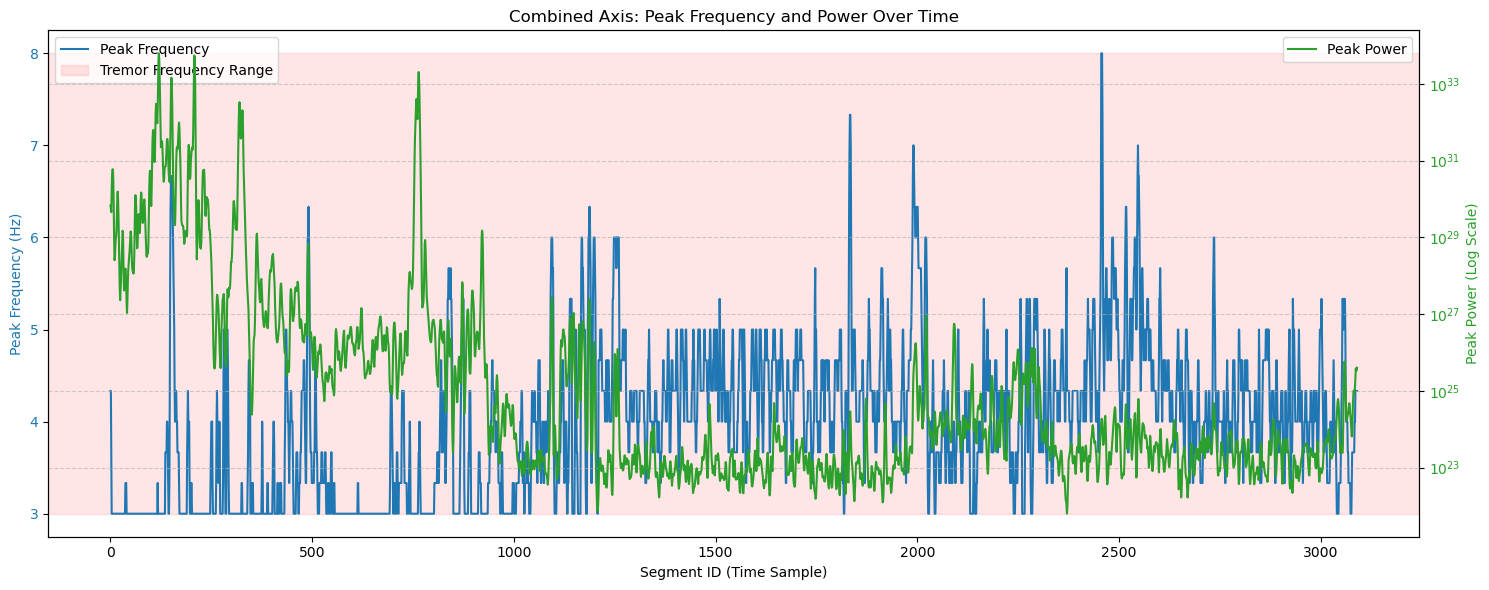

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame from the combined results list for easier plotting
df_combined_features = pd.DataFrame(combined_psd_results)

# Create a figure with a secondary y-axis for power
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the peak frequency on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Segment ID (Time Sample)')
ax1.set_ylabel('Peak Frequency (Hz)', color=color)
ax1.plot(df_combined_features['segment_id'], df_combined_features['peak_freq_Hz'], color=color, label='Peak Frequency')
ax1.tick_params(axis='y', labelcolor=color)

# Add the tremor frequency range
ax1.axhspan(3, 8, color='red', alpha=0.1, label='Tremor Frequency Range')
ax1.legend(loc='upper left')

# Create a secondary y-axis for peak power
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Peak Power (Log Scale)', color=color)
ax2.plot(df_combined_features['segment_id'], df_combined_features['peak_power'], color=color, label='Peak Power')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log') # Use a log scale due to the large power values
ax2.legend(loc='upper right')

plt.title('Combined Axis: Peak Frequency and Power Over Time')
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

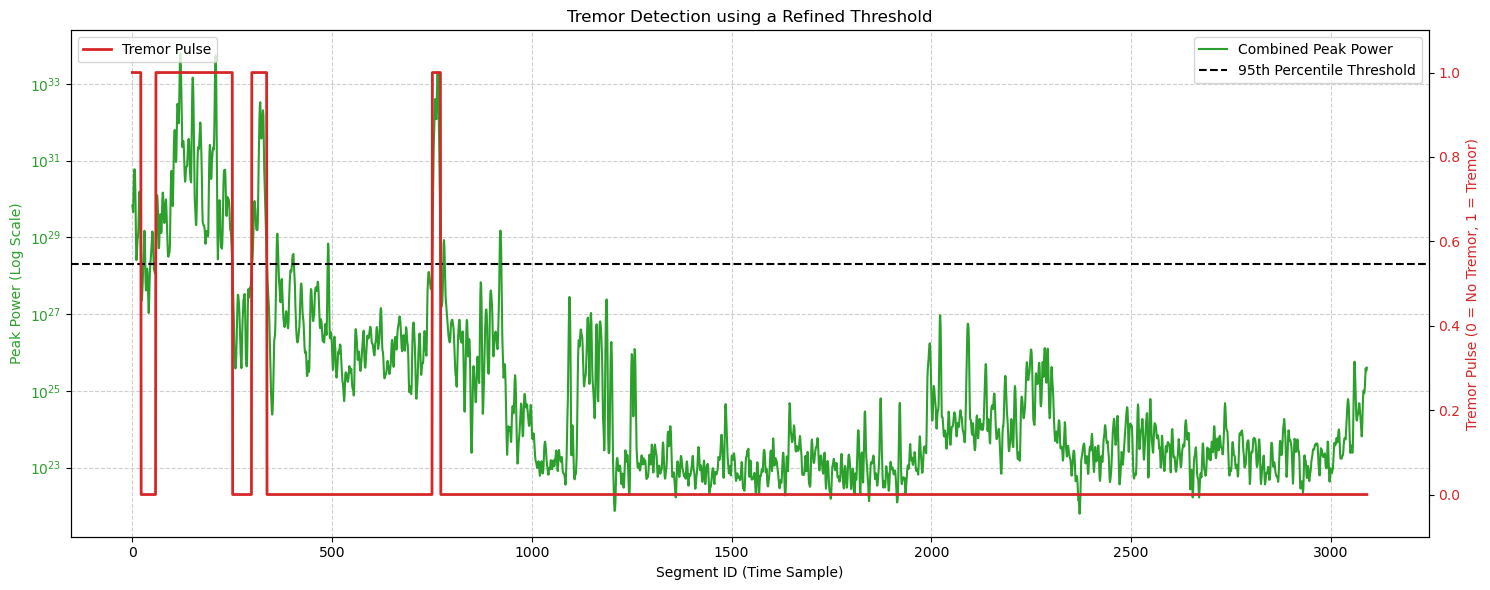

In [29]:
# Assuming df_combined_features is a DataFrame containing your combined PSD results
import numpy as np
import matplotlib.pyplot as plt

# Get the peak power values and set a more reliable threshold
peak_power_values = df_combined_features['peak_power']
threshold_value = np.percentile(peak_power_values, 90) # Use the 95th percentile as a robust threshold

# Create a tremor pulse signal based on the new threshold
tremor_pulse = np.zeros(len(df_combined_features))
above_threshold_indices = df_combined_features[df_combined_features['peak_power'] > threshold_value].index
tremor_pulse[above_threshold_indices] = 1

# Filter for consecutive pulses to ensure the tremor persists (as in the paper)
min_duration_windows = 10
filtered_tremor_pulse = np.zeros_like(tremor_pulse)
current_duration = 0
for i in range(len(tremor_pulse)):
    if tremor_pulse[i] == 1:
        current_duration += 1
    else:
        if current_duration >= min_duration_windows:
            filtered_tremor_pulse[i - current_duration:i] = 1
        current_duration = 0
if current_duration >= min_duration_windows:
    filtered_tremor_pulse[len(tremor_pulse) - current_duration:] = 1

# Plot the results
fig, ax1 = plt.subplots(figsize=(15, 6))
color = 'tab:green'
ax1.set_xlabel('Segment ID (Time Sample)')
ax1.set_ylabel('Peak Power (Log Scale)', color=color)
ax1.plot(df_combined_features['segment_id'], df_combined_features['peak_power'], color=color, label='Combined Peak Power')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.axhline(y=threshold_value, color='black', linestyle='--', label='95th Percentile Threshold')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.6)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Tremor Pulse (0 = No Tremor, 1 = Tremor)', color=color)
ax2.plot(df_combined_features['segment_id'], filtered_tremor_pulse, color=color, linewidth=2, label='Tremor Pulse')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0.1, 1.1)
ax2.legend(loc='upper left')

plt.title('Tremor Detection using a Refined Threshold')
fig.tight_layout()
plt.show()

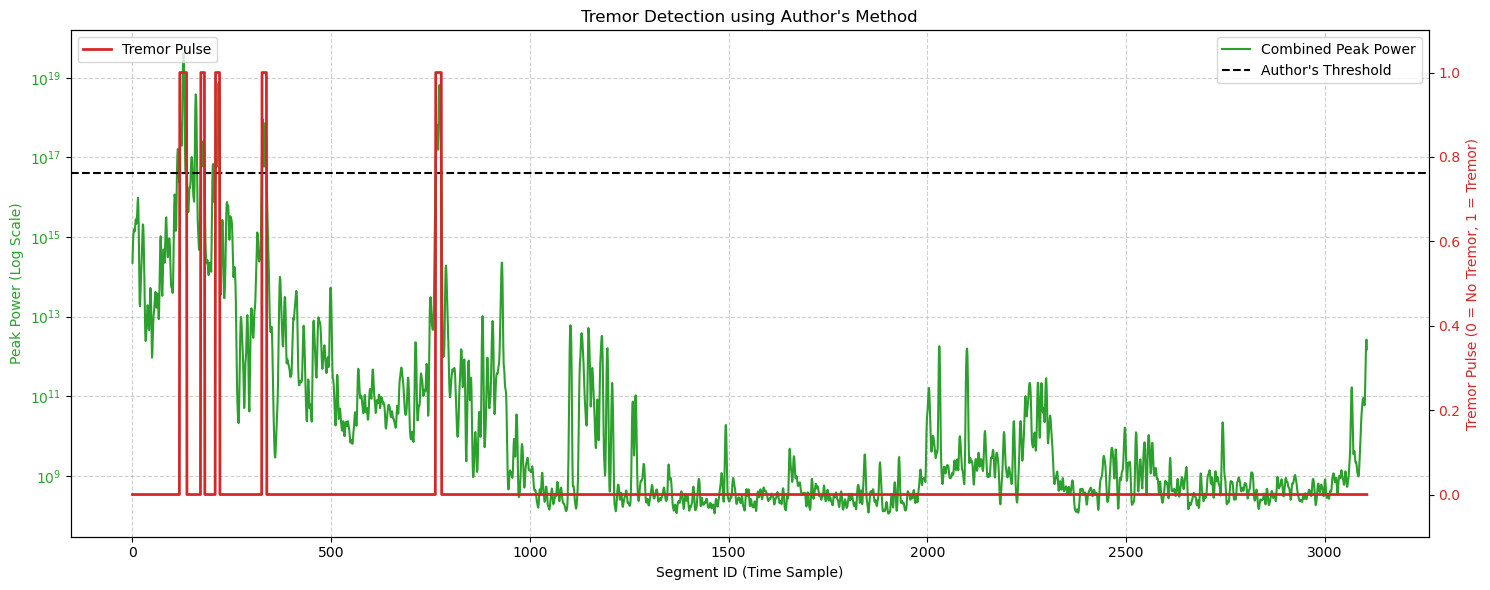

In [27]:
# Assuming df_combined_features is a DataFrame containing your combined PSD results
import numpy as np
import matplotlib.pyplot as plt

# Get the peak power values and set a more reliable threshold
peak_power_values = df_combined_features['peak_power']
max_peak_power = np.max(peak_power_values)

# --- This is the specific line to tweak ---
threshold_value = max_peak_power / 1000
# --- This is the specific line to tweak ---

# Create a tremor pulse signal based on the new threshold
tremor_pulse = np.zeros(len(df_combined_features))
above_threshold_indices = df_combined_features[df_combined_features['peak_power'] > threshold_value].index
tremor_pulse[above_threshold_indices] = 1

# Filter for consecutive pulses to ensure the tremor persists (as in the paper)
min_duration_windows = 10
filtered_tremor_pulse = np.zeros_like(tremor_pulse)
current_duration = 0
for i in range(len(tremor_pulse)):
    if tremor_pulse[i] == 1:
        current_duration += 1
    else:
        if current_duration >= min_duration_windows:
            filtered_tremor_pulse[i - current_duration:i] = 1
        current_duration = 0
if current_duration >= min_duration_windows:
    filtered_tremor_pulse[len(tremor_pulse) - current_duration:] = 1

# Plot the results
fig, ax1 = plt.subplots(figsize=(15, 6))
color = 'tab:green'
ax1.set_xlabel('Segment ID (Time Sample)')
ax1.set_ylabel('Peak Power (Log Scale)', color=color)
ax1.plot(df_combined_features['segment_id'], df_combined_features['peak_power'], color=color, label='Combined Peak Power')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.axhline(y=threshold_value, color='black', linestyle='--', label='Author\'s Threshold')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.6)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Tremor Pulse (0 = No Tremor, 1 = Tremor)', color=color)
ax2.plot(df_combined_features['segment_id'], filtered_tremor_pulse, color=color, linewidth=2, label='Tremor Pulse')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0.1, 1.1)
ax2.legend(loc='upper left')

plt.title('Tremor Detection using Author\'s Method')
fig.tight_layout()
plt.show()

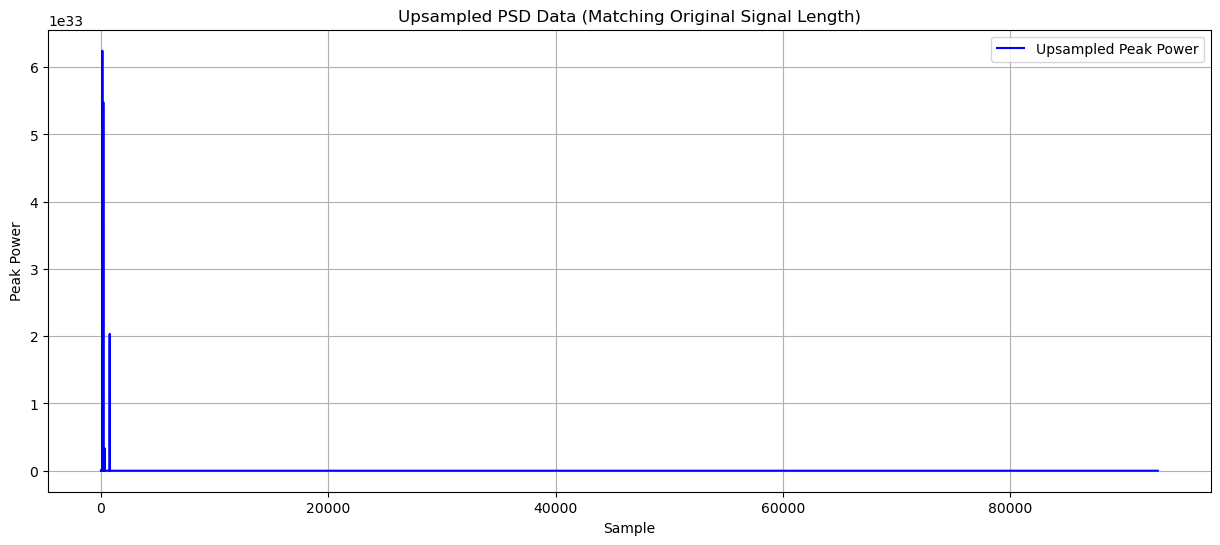

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Get the original time points from the segment IDs
original_time_points = df_combined_features['segment_id'].values

# Get the data to be upsampled (e.g., the peak power)
data_to_upsample = df_combined_features['peak_power'].values

# Create the new time axis with the length of the original data
total_samples = len(df_no_drift)
new_time_axis = np.arange(total_samples)

# Perform the upsampling using linear interpolation
upsampled_data = np.interp(new_time_axis, original_time_points, data_to_upsample)

# Plot the result
plt.figure(figsize=(15, 6))
plt.plot(upsampled_data, label='Upsampled Peak Power', color='blue')
plt.title('Upsampled PSD Data (Matching Original Signal Length)')
plt.xlabel('Sample')
plt.ylabel('Peak Power')
plt.grid(True)
plt.legend()
plt.show()

Upsampled data smoothed successfully.


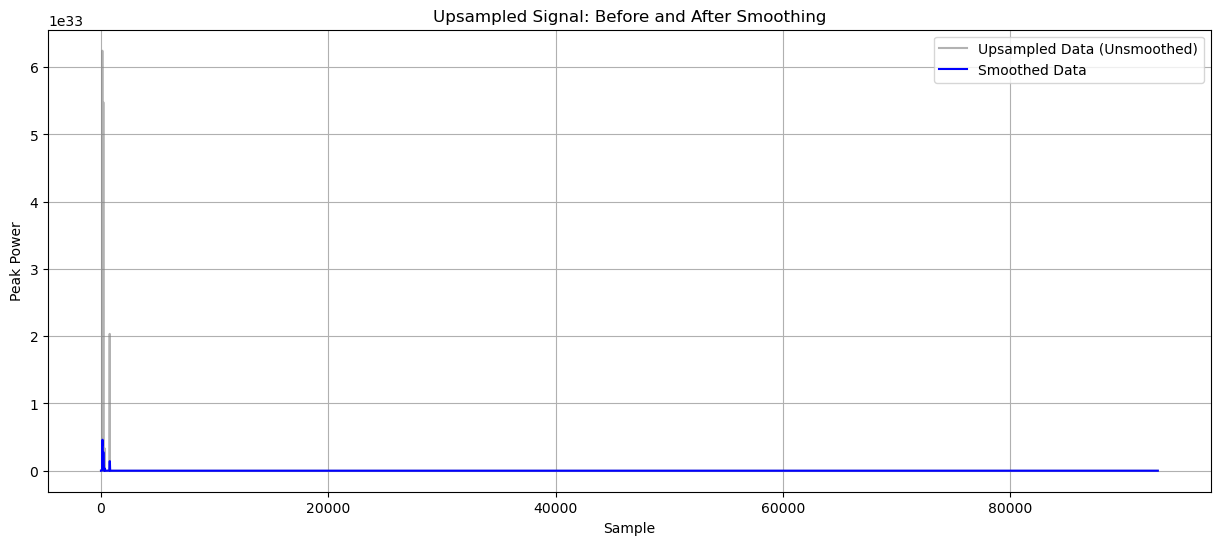

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume upsampled_data is the variable from the previous step.
# For a self-contained code block, we will re-generate it here.
# (This code should be run after the upsampling cell)
if 'upsampled_data' in locals() and upsampled_data is not None:
    # We will use a moving average filter for smoothing
    moving_average_window = 50

    # Apply the moving average filter to the upsampled data
    upsampled_smoothed = pd.Series(upsampled_data).rolling(
        window=moving_average_window, 
        center=True
    ).mean().fillna(0) # Fill NaN values with 0 at the edges

    print("Upsampled data smoothed successfully.")

    # Plot the original upsampled data vs. the smoothed version
    plt.figure(figsize=(15, 6))
    plt.plot(upsampled_data, label='Upsampled Data (Unsmoothed)', color='gray', alpha=0.6)
    plt.plot(upsampled_smoothed, label='Smoothed Data', color='blue')
    plt.title('Upsampled Signal: Before and After Smoothing')
    plt.xlabel('Sample')
    plt.ylabel('Peak Power')
    plt.grid(True)
    plt.legend()
    plt.show()